In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
df=pd.read_csv("/content/drive/MyDrive/EDA Bootcamp/Amazon dataset.csv")

In [3]:
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


# **A. Initial Data Exploration &amp; Cleaning**




In [4]:
df.dtypes

,0
order_id,object
customer_id,object
product_id,object
product_name,object
main_category,object
sub_category,object
brand,object
price,float64
quantity,int64
discount_percent,int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            25000 non-null  object 
 1   customer_id         25000 non-null  object 
 2   product_id          25000 non-null  object 
 3   product_name        25000 non-null  object 
 4   main_category       25000 non-null  object 
 5   sub_category        25000 non-null  object 
 6   brand               23750 non-null  object 
 7   price               24750 non-null  float64
 8   quantity            25000 non-null  int64  
 9   discount_percent    25000 non-null  int64  
 10  final_price         25000 non-null  float64
 11  payment_method      23750 non-null  object 
 12  review_rating       25000 non-null  int64  
 13  order_date          25000 non-null  object 
 14  delivery_days       24750 non-null  float64
 15  is_returned         25000 non-null  int64  
 16  regi

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

,0
order_id,object
customer_id,object
product_id,object
product_name,object
main_category,object
sub_category,object
brand,object
price,float64
quantity,int64
discount_percent,int64


In [7]:
df.isnull().sum()/len(df)*100

,0
order_id,0.0
customer_id,0.0
product_id,0.0
product_name,0.0
main_category,0.0
sub_category,0.0
brand,5.0
price,1.0
quantity,0.0
discount_percent,0.0


In [8]:
col=['brand','payment_method','region','device_type','customer_age_group']
for cols in df[col]:
  df[cols].fillna(df[cols].mode()[0], inplace=True)

/tmp/ipython-input-3253324198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[cols].fillna(df[cols].mode()[0], inplace=True)


In [9]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
product_name,0
main_category,0
sub_category,0
brand,0
price,250
quantity,0
discount_percent,0


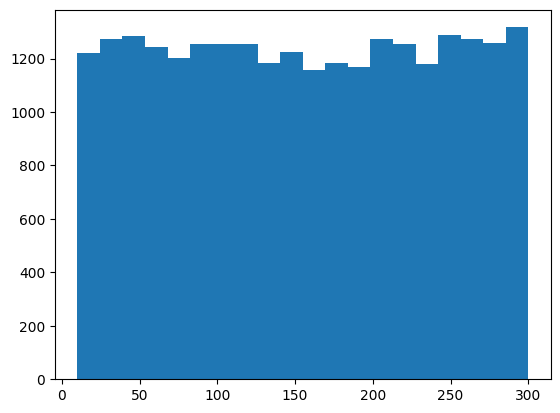

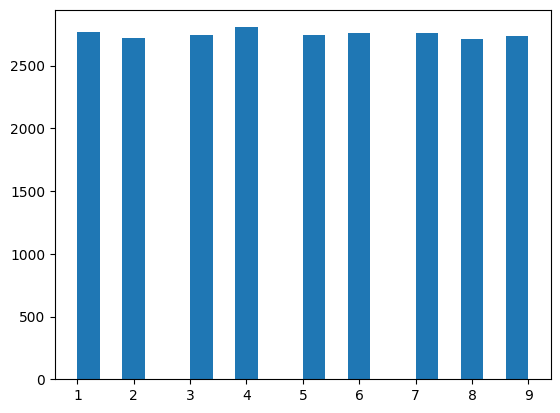

In [10]:
n_col=['price','delivery_days']
for col in n_col:
  plt.hist(df[col],bins=20)
  plt.show()

In [11]:
df['price'].fillna(df['price'].mean(),inplace=True)
df['delivery_days'].fillna(df['delivery_days'].mean(),inplace=True)

/tmp/ipython-input-2117718950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].mean(),inplace=True)
/tmp/ipython-input-2117718950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [12]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
product_name,0
main_category,0
sub_category,0
brand,0
price,0
quantity,0
discount_percent,0


**3. Duplicates &amp; Integrity:**

In [13]:
df['price'].duplicated().sum()

np.int64(8423)

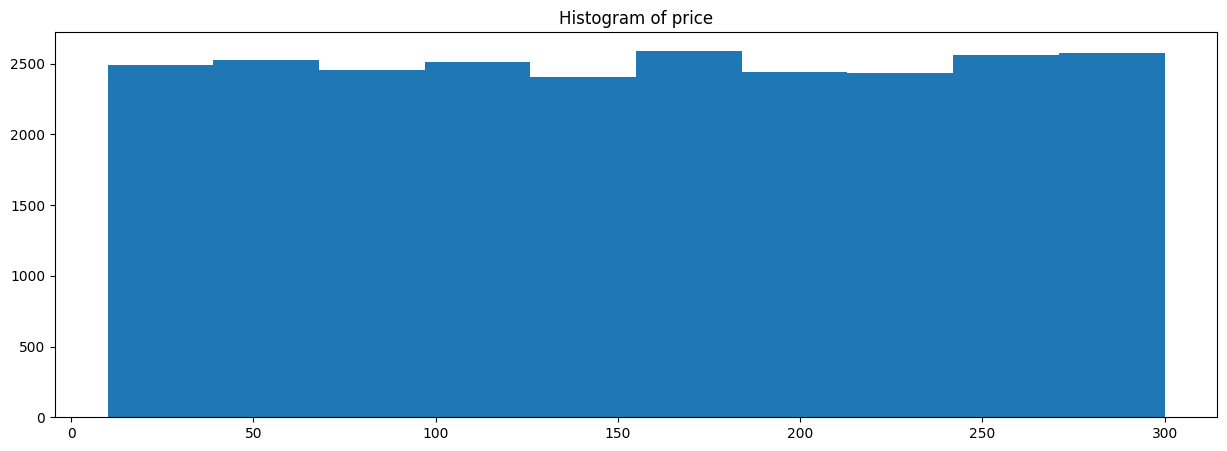

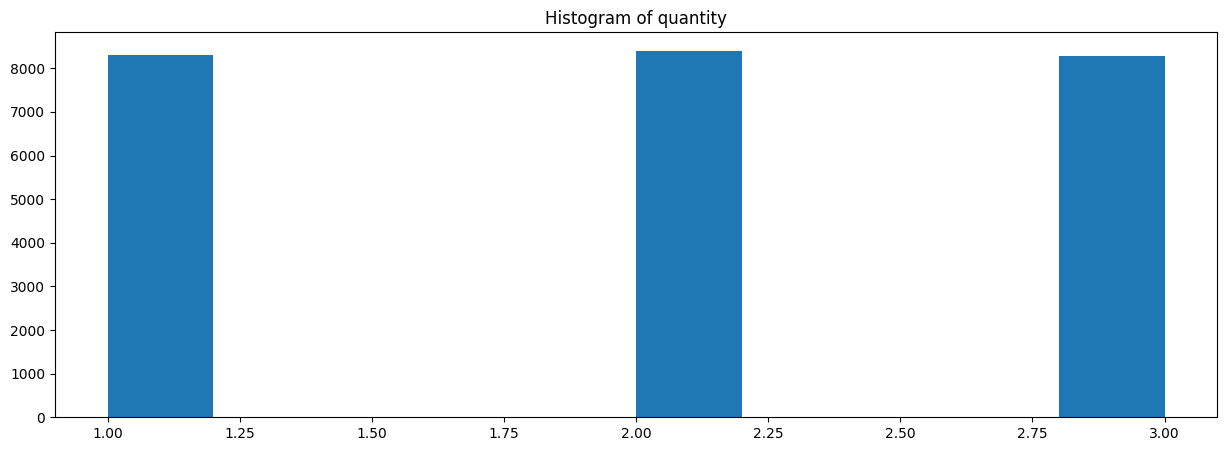

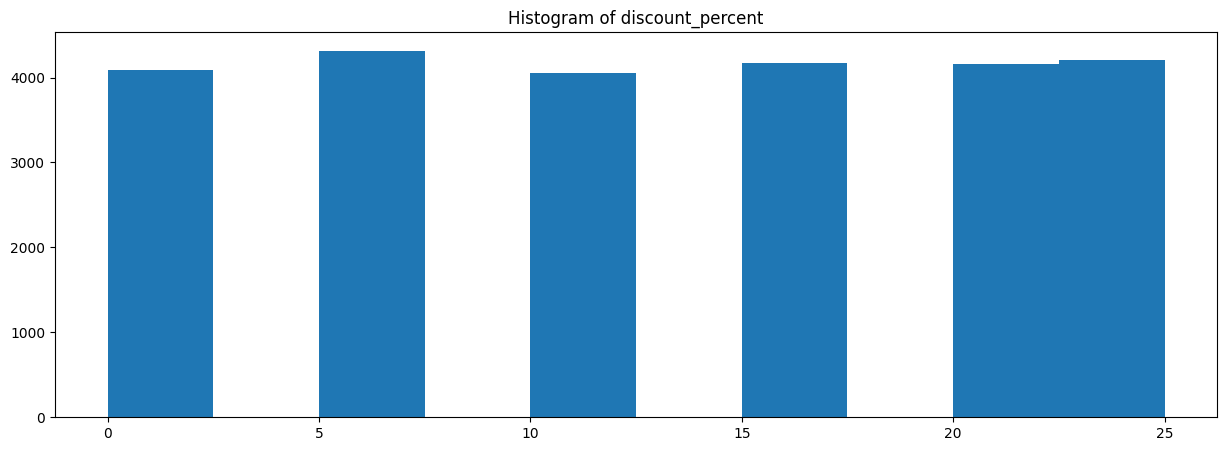

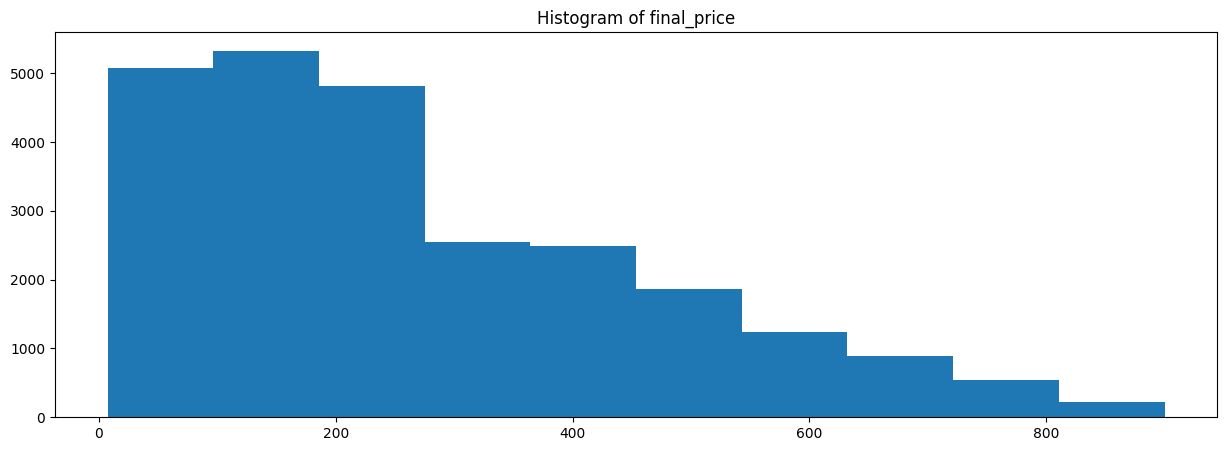

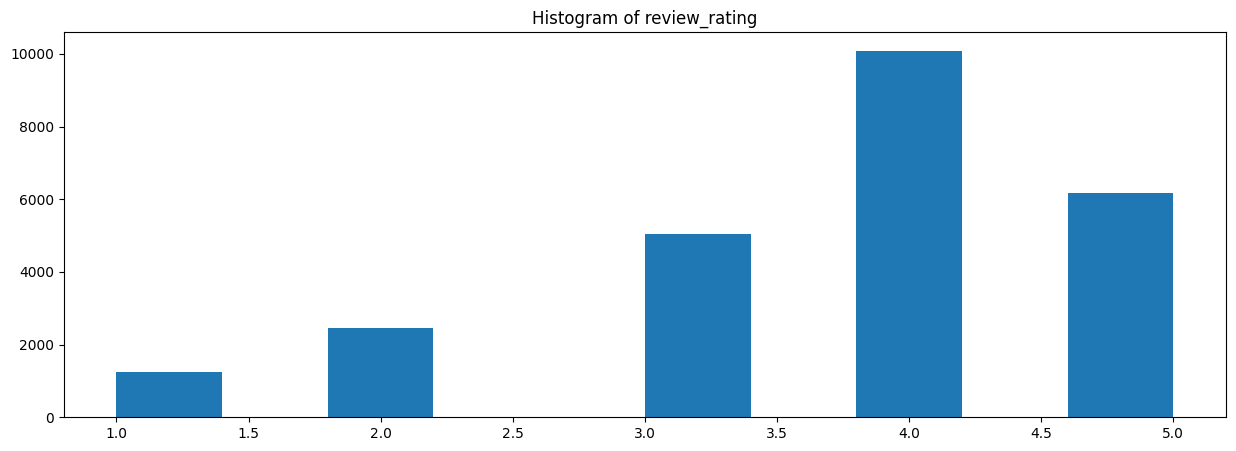

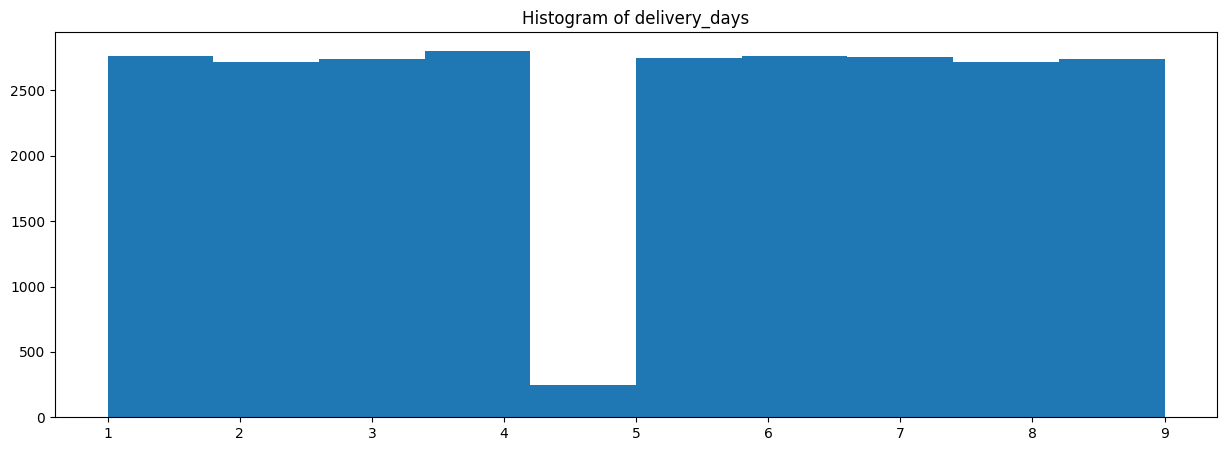

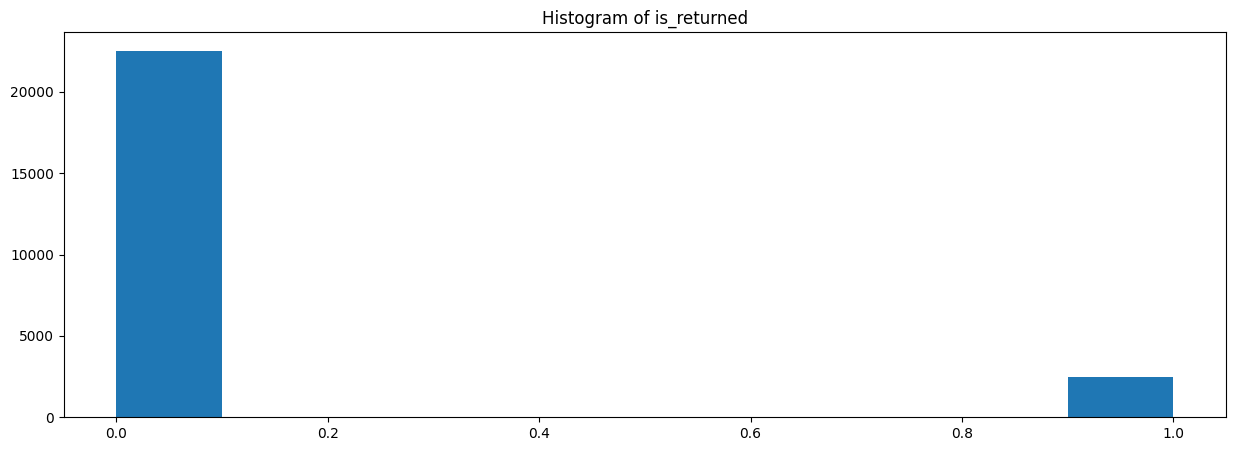

In [14]:
for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(15,5))
  plt.hist(x=df[col])
  plt.title(f'Histogram of {col}')


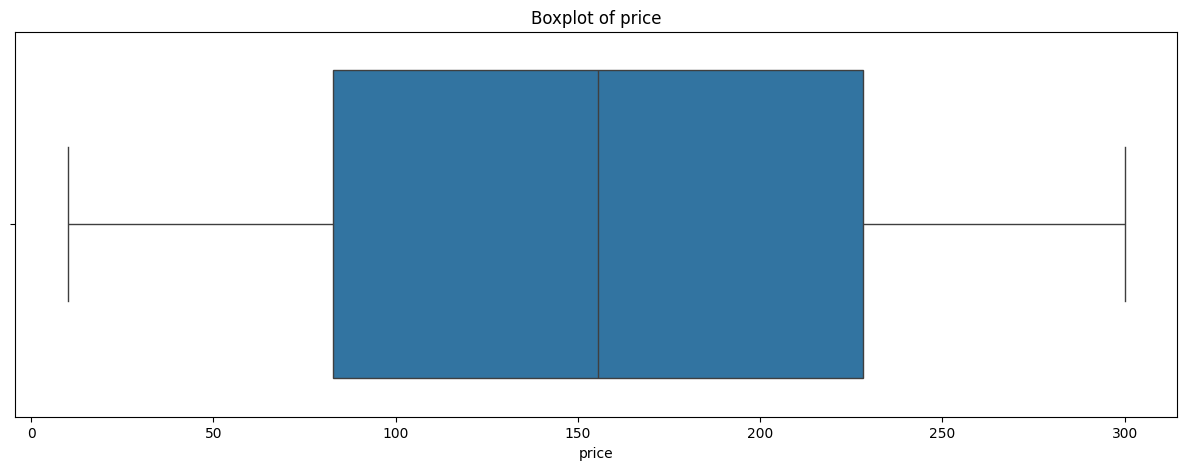

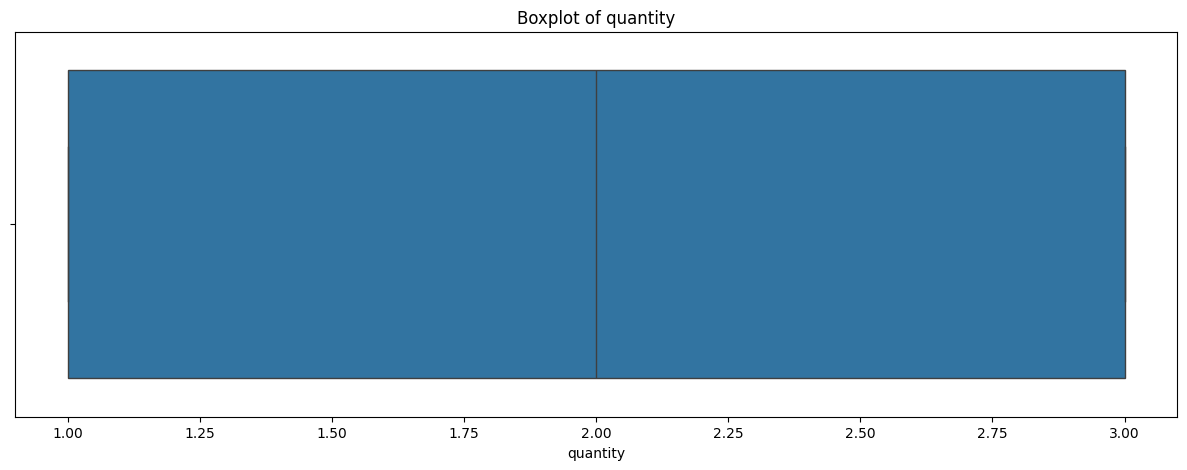

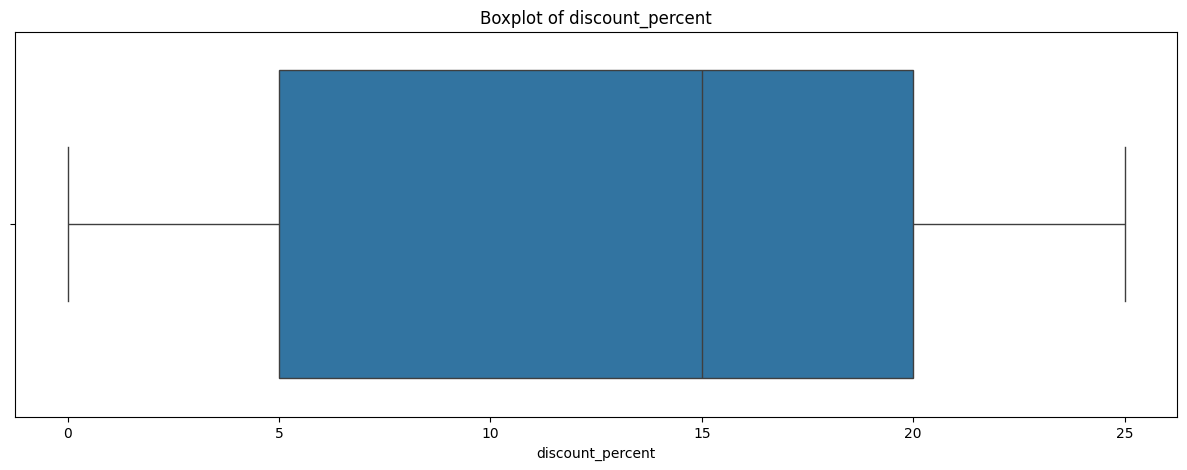

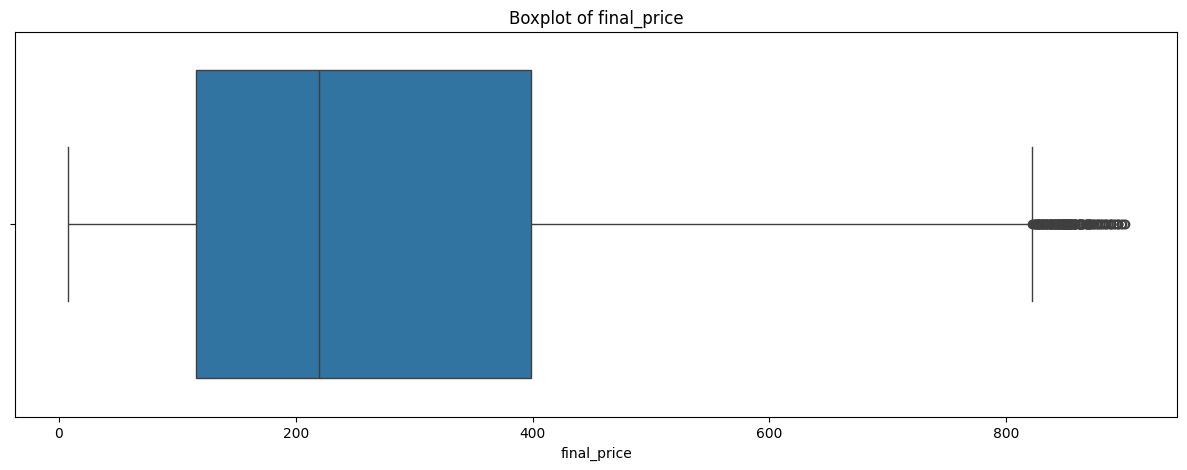

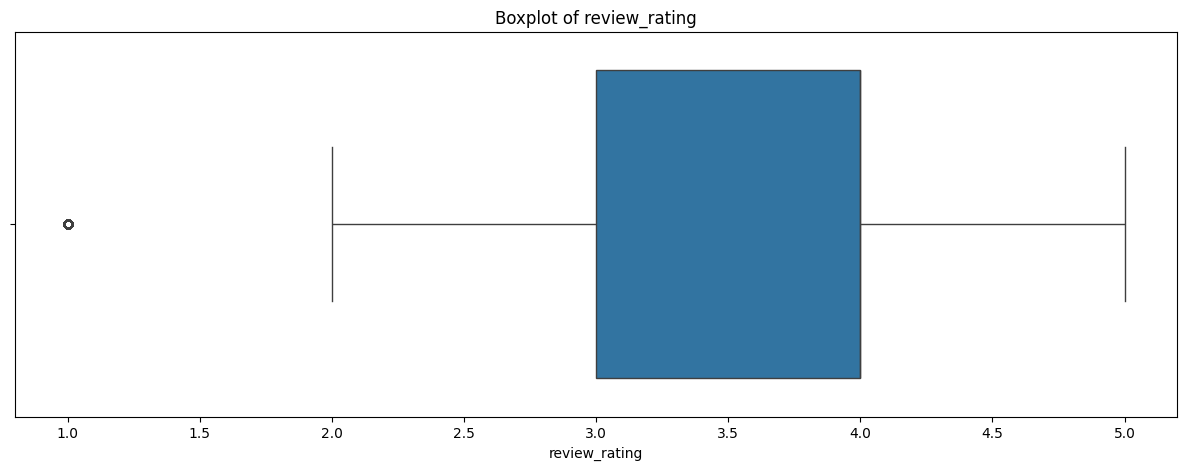

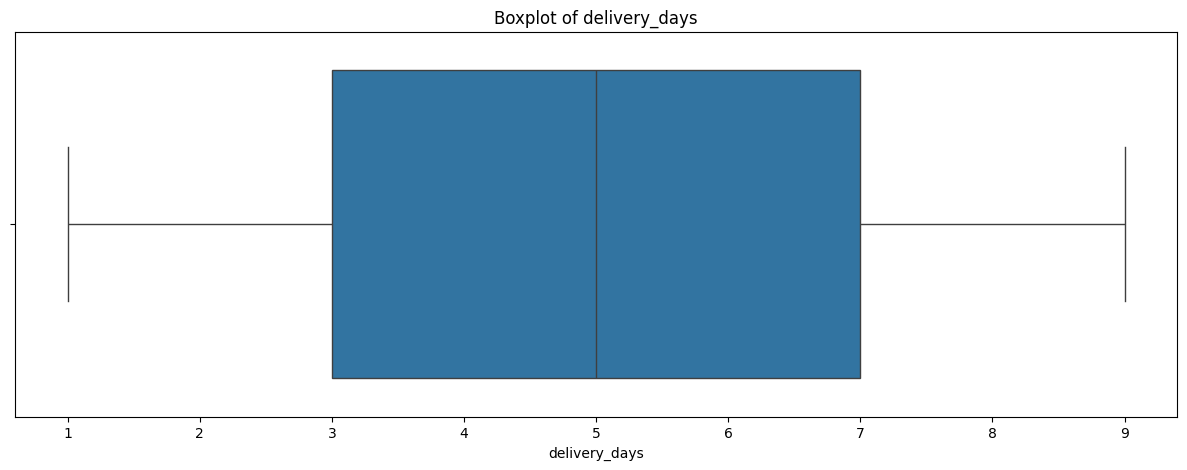

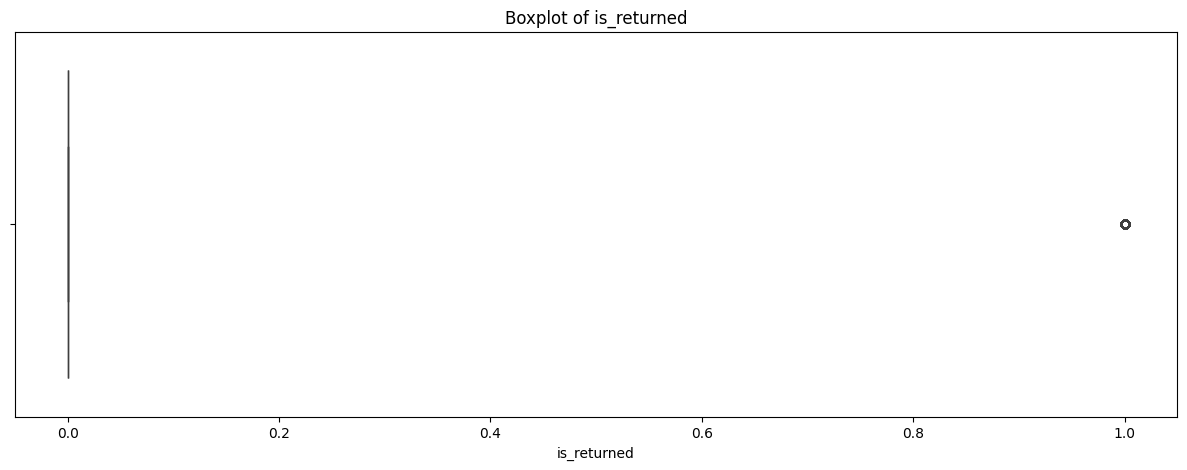

In [15]:
for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(15,5))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')


  p_75=df[col].quantile(0.75)
  p_25=df[col].quantile(0.25)
  IQR=p_75-p_25

  upper_limit=p_75+1.5*IQR
  lower_limit=p_25-1.5*IQR

  outliers=df[(df[col]>upper_limit)|(df[col]<lower_limit)]
  len(outliers)

In [16]:
  for col in df.select_dtypes(include='number'):
    p_75=df[col].quantile(0.75)
    p_25=df[col].quantile(0.25)
    IQR=p_75-p_25

    upper_limit=p_75+1.5*IQR
    lower_limit=p_25-1.5*IQR

    print(f"Column: {col}")
    print(f"  IQR: {IQR}")
    print(f"  Upper limit: {upper_limit}")
    print(f"  Lower limit: {lower_limit}")

    outliers=df[(df[col]>upper_limit)|(df[col]<lower_limit)]
    print(f"  Outliers found: {len(outliers)}")
    print()

Column: price
  IQR: 145.35750000000002
  Upper limit: 446.28125
  Lower limit: -135.14875
  Outliers found: 0

Column: quantity
  IQR: 2.0
  Upper limit: 6.0
  Lower limit: -2.0
  Outliers found: 0

Column: discount_percent
  IQR: 15.0
  Upper limit: 42.5
  Lower limit: -17.5
  Outliers found: 0

Column: final_price
  IQR: 282.3175
  Upper limit: 822.04125
  Lower limit: -307.22875
  Outliers found: 174

Column: review_rating
  IQR: 1.0
  Upper limit: 5.5
  Lower limit: 1.5
  Outliers found: 1254

Column: delivery_days
  IQR: 4.0
  Upper limit: 13.0
  Lower limit: -3.0
  Outliers found: 0

Column: is_returned
  IQR: 0.0
  Upper limit: 0.0
  Lower limit: 0.0
  Outliers found: 2461



In [17]:
new_df=df.copy()

new_df[col]=np.where(
    new_df[col]>upper_limit,
    upper_limit,
    np.where(
        new_df[col]<lower_limit,
        lower_limit,
        new_df[col]
    )
)

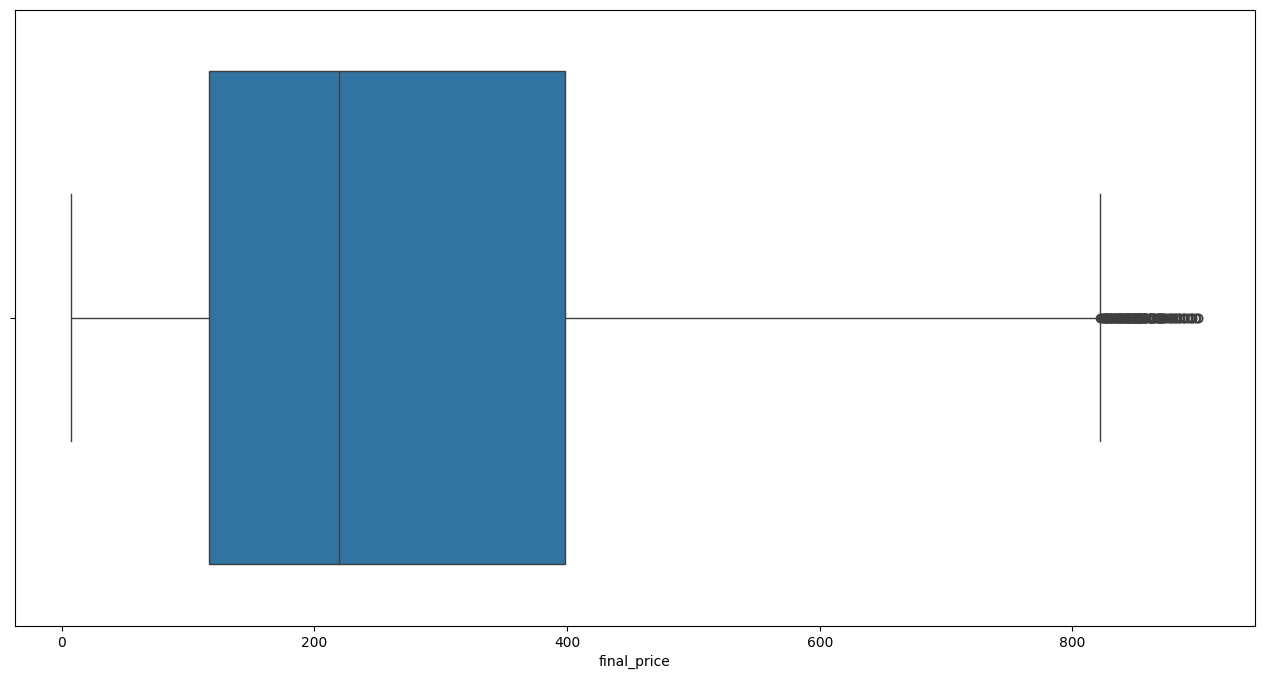

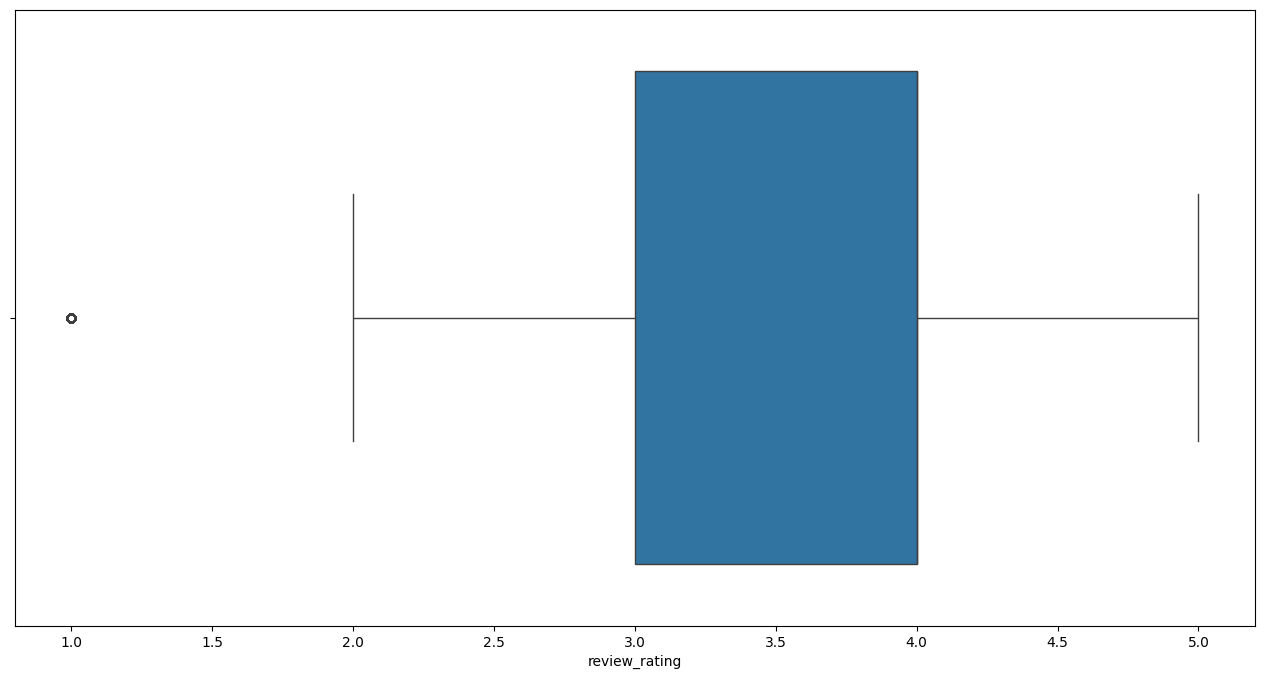

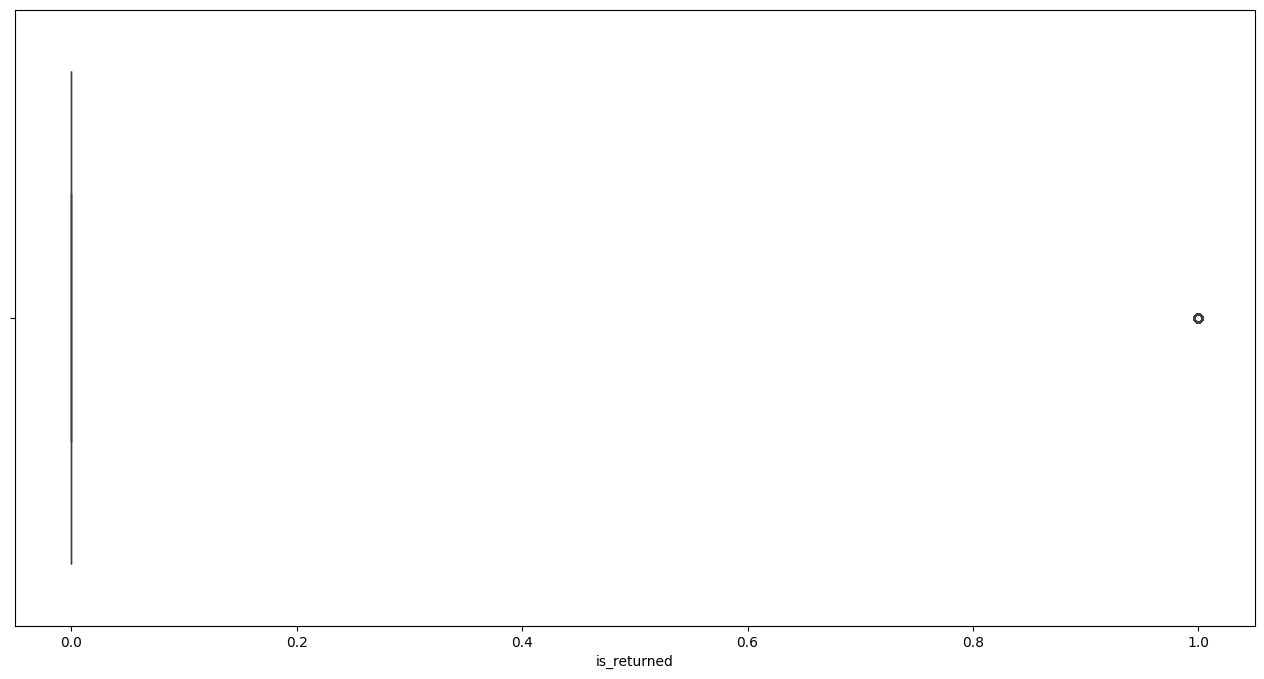

In [18]:
cols=['final_price','review_rating','is_returned']

for col in cols:
  plt.figure(figsize=(16,8))
  sns.boxplot(x=df[col])


In [19]:
df['order_month'] = df['order_date'].dt.month
df['order_weekday'] = df['order_date'].dt.weekday
df['order_year'] = df['order_date'].dt.year
df

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type,order_month,order_weekday,order_year
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,...,3,2024-09-10,5.0,0,Midwest,25-34,Mobile,9,1,2024
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,...,2,2025-06-25,8.0,0,West,25-34,Mobile,6,2,2025
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,...,4,2025-01-08,5.0,0,Northeast,35-44,Mobile,1,2,2025
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,...,5,2024-08-28,3.0,0,Midwest,45-54,Mobile,8,2,2024
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,...,1,2024-11-12,5.0,0,Midwest,45-54,Mobile,11,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,#ILAE3C44K8ST2N,AA4894A31451,2NC0ZUOVYO,Carter's Hats,Baby,Hats,Carter's,128.26,1,20,...,4,2024-11-15,9.0,0,Northeast,55+,Desktop,11,4,2024
24996,#6FRTXV3I6X8MR6,690989345A38,Y0ASBZXA10,Reebok Sandals,women,Sandals,Reebok,200.66,3,20,...,3,2025-01-10,4.0,0,Northeast,45-54,Desktop,1,4,2025
24997,#DU71O3MXXZVT1L,440170188725,590V1TJQGC,Levi's Jeans,Men,Jeans,Levi's,130.87,2,20,...,1,2025-01-09,8.0,0,Midwest,25-34,App,1,3,2025
24998,#YHNPOPWUO47P0G,A8A224901522,QNPGMXCYIS,The Peanutshell Booties,Baby,Booti3s,The Peanutshell,172.17,1,15,...,4,2024-10-23,4.0,0,Northeast,25-34,Desktop,10,2,2024


In [20]:
df['discount_amount']=df['price'] * df['discount_percent'] / 100
df

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,order_date,delivery_days,is_returned,region,customer_age_group,device_type,order_month,order_weekday,order_year,discount_amount
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,...,2024-09-10,5.0,0,Midwest,25-34,Mobile,9,1,2024,11.8620
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,...,2025-06-25,8.0,0,West,25-34,Mobile,6,2,2025,4.0260
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,...,2025-01-08,5.0,0,Northeast,35-44,Mobile,1,2,2025,54.8450
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,...,2024-08-28,3.0,0,Midwest,45-54,Mobile,8,2,2024,0.0000
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,...,2024-11-12,5.0,0,Midwest,45-54,Mobile,11,1,2024,14.5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,#ILAE3C44K8ST2N,AA4894A31451,2NC0ZUOVYO,Carter's Hats,Baby,Hats,Carter's,128.26,1,20,...,2024-11-15,9.0,0,Northeast,55+,Desktop,11,4,2024,25.6520
24996,#6FRTXV3I6X8MR6,690989345A38,Y0ASBZXA10,Reebok Sandals,women,Sandals,Reebok,200.66,3,20,...,2025-01-10,4.0,0,Northeast,45-54,Desktop,1,4,2025,40.1320
24997,#DU71O3MXXZVT1L,440170188725,590V1TJQGC,Levi's Jeans,Men,Jeans,Levi's,130.87,2,20,...,2025-01-09,8.0,0,Midwest,25-34,App,1,3,2025,26.1740
24998,#YHNPOPWUO47P0G,A8A224901522,QNPGMXCYIS,The Peanutshell Booties,Baby,Booti3s,The Peanutshell,172.17,1,15,...,2024-10-23,4.0,0,Northeast,25-34,Desktop,10,2,2024,25.8255


In [21]:
df['unit_price']=df['final_price']/df['quantity']
df

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,delivery_days,is_returned,region,customer_age_group,device_type,order_month,order_weekday,order_year,discount_amount,unit_price
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,...,5.0,0,Midwest,25-34,Mobile,9,1,2024,11.8620,106.760000
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,...,8.0,0,West,25-34,Mobile,6,2,2025,4.0260,22.810000
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,...,5.0,0,Northeast,35-44,Mobile,1,2,2025,54.8450,164.535000
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,...,3.0,0,Midwest,45-54,Mobile,8,2,2024,0.0000,12.050000
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,...,5.0,0,Midwest,45-54,Mobile,11,1,2024,14.5360,130.820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,#ILAE3C44K8ST2N,AA4894A31451,2NC0ZUOVYO,Carter's Hats,Baby,Hats,Carter's,128.26,1,20,...,9.0,0,Northeast,55+,Desktop,11,4,2024,25.6520,102.610000
24996,#6FRTXV3I6X8MR6,690989345A38,Y0ASBZXA10,Reebok Sandals,women,Sandals,Reebok,200.66,3,20,...,4.0,0,Northeast,45-54,Desktop,1,4,2025,40.1320,160.526667
24997,#DU71O3MXXZVT1L,440170188725,590V1TJQGC,Levi's Jeans,Men,Jeans,Levi's,130.87,2,20,...,8.0,0,Midwest,25-34,App,1,3,2025,26.1740,104.695000
24998,#YHNPOPWUO47P0G,A8A224901522,QNPGMXCYIS,The Peanutshell Booties,Baby,Booti3s,The Peanutshell,172.17,1,15,...,4.0,0,Northeast,25-34,Desktop,10,2,2024,25.8255,146.340000


In [22]:
threshold=5
df['delivery_speed'] = np.where(df['delivery_days'] >= threshold, 'fast', 'slow')

In [23]:
customer_agg=df.groupby(['customer_id']).agg({
    'price':'sum',
    'order_id':'count',
    'review_rating':'mean',
    'is_returned':'mean'

})

display(customer_agg)

,price,order_id,review_rating,is_returned
customer_id,,,,
0000A5486A60,188.66,1,2.0,0.0
000128A482A9,171.55,1,3.0,0.0
0006310A3377,270.69,1,5.0,0.0
00069A393862,285.17,1,3.0,0.0
00070A643221,86.88,1,4.0,0.0
...,...,...,...,...
AAA992357434,84.01,1,3.0,0.0
AAAA33688A18,140.62,1,4.0,0.0
AAAA437A5312,49.75,1,3.0,0.0


# **B. Univariate Analysis**

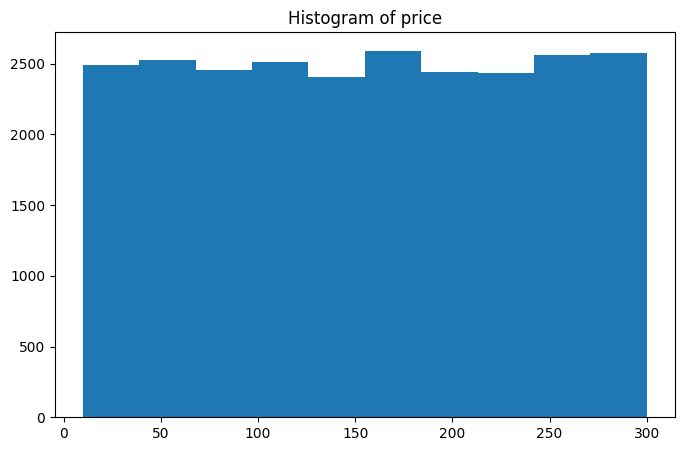

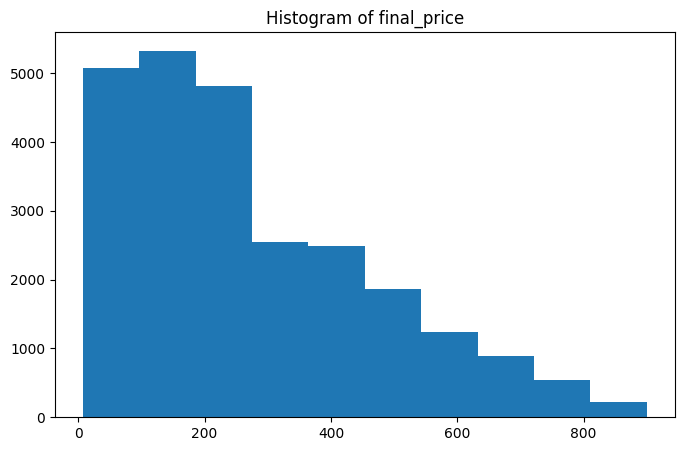

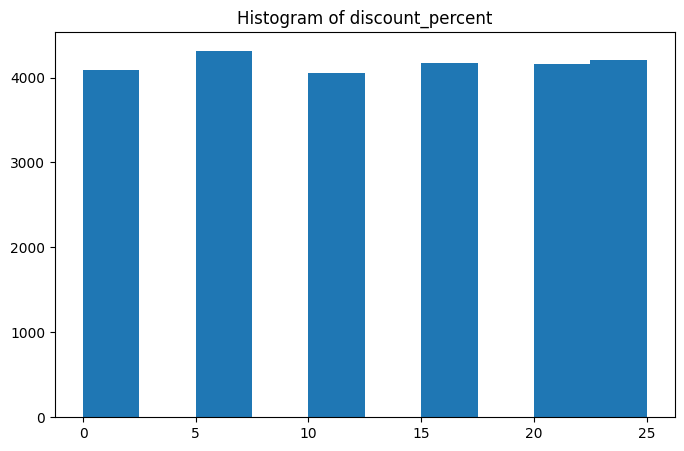

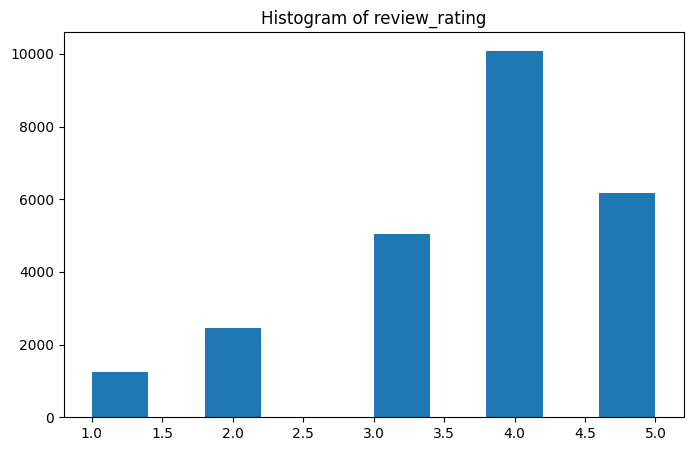

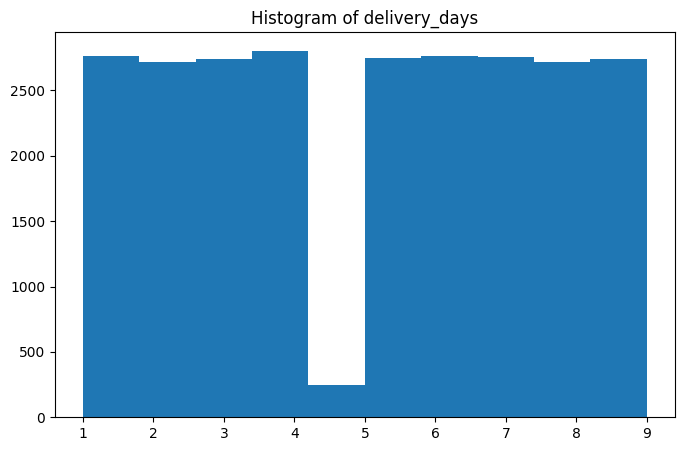

In [24]:
num_cols=['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']
for col in num_cols:
  plt.figure(figsize=(8,5))
  plt.hist(x=df[col])
  plt.title(f"Histogram of {col}")

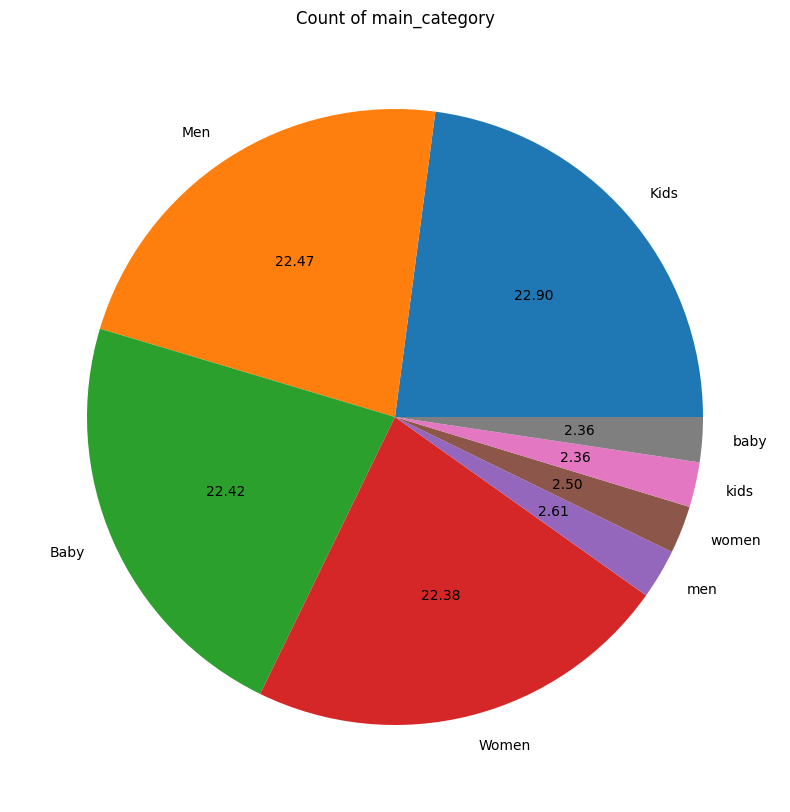

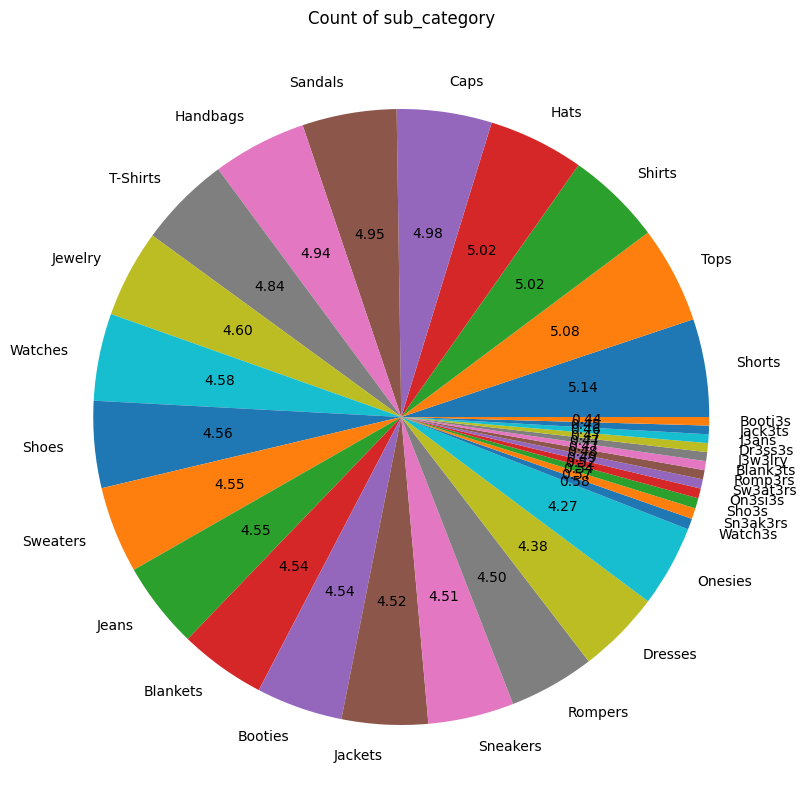

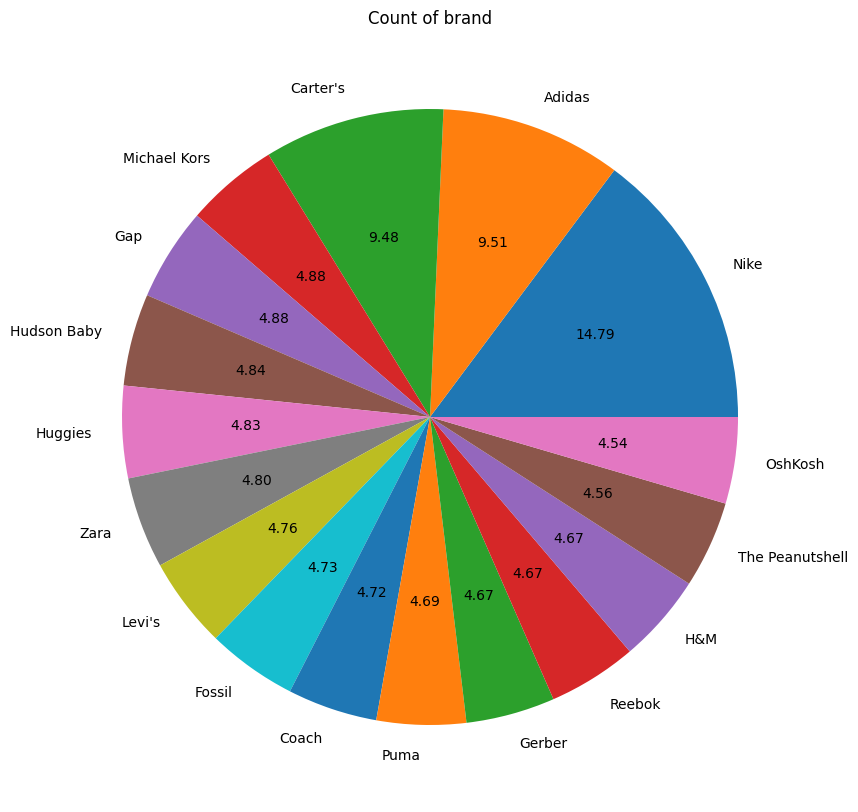

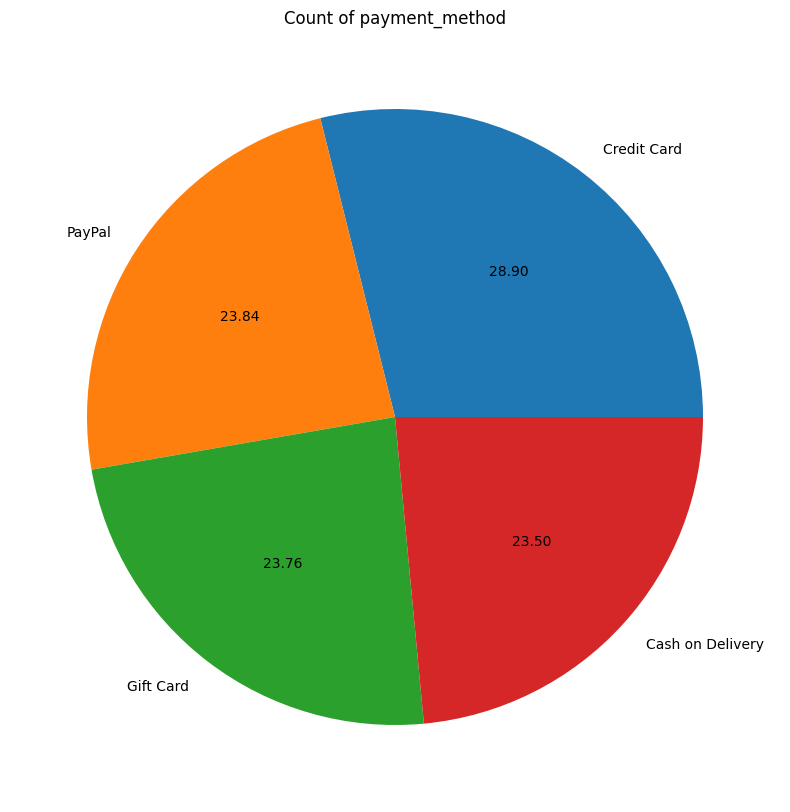

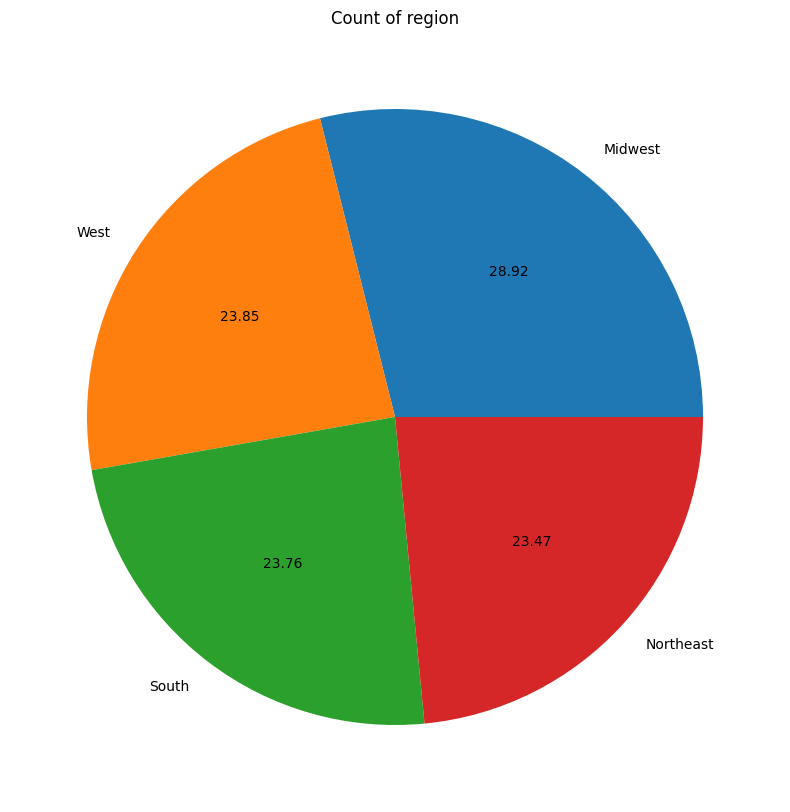

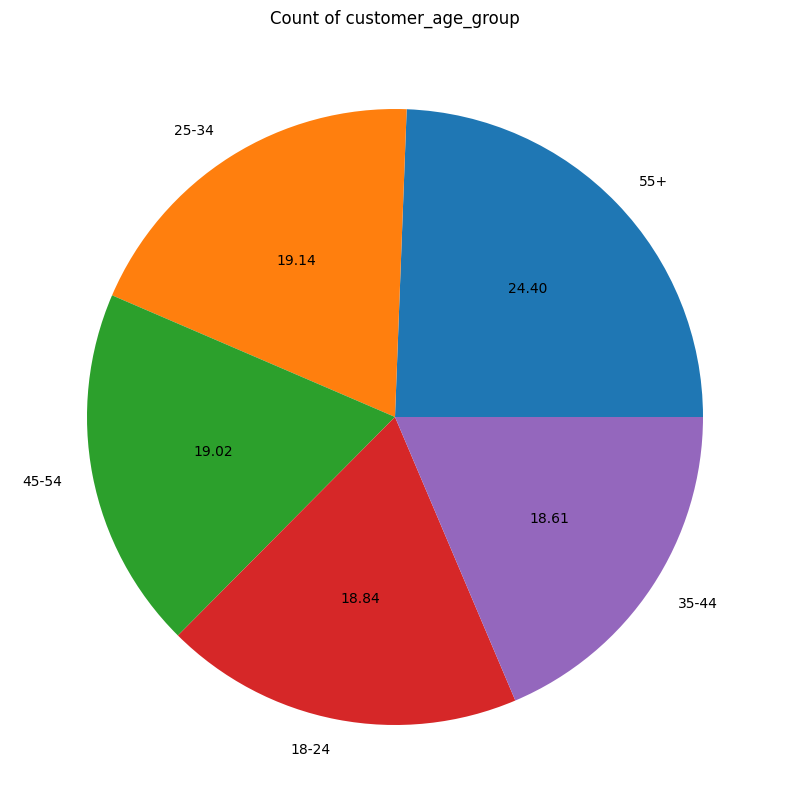

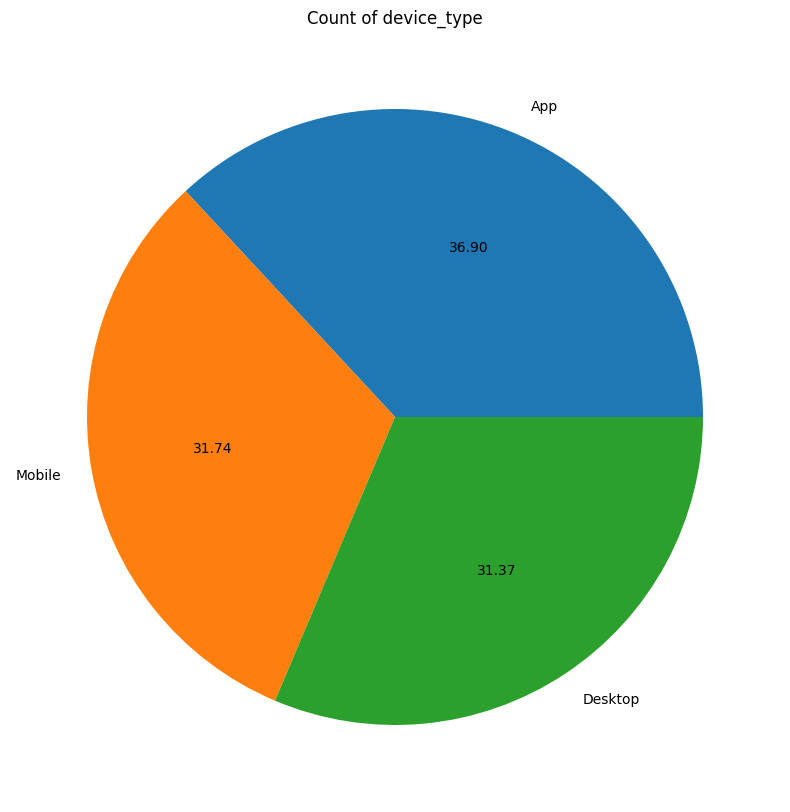

In [25]:
cat_cols=['main_category', 'sub_category', 'brand', 'payment_method',
'region', 'customer_age_group', 'device_type']

for c_col in cat_cols:
  counts=df[c_col].value_counts()
  plt.figure(figsize=(10, 10))
  plt.pie(counts,labels=counts.index,autopct='%.2f')
  plt.title(f"Count of {c_col}")

# **C. Bivariate &amp; Multivariate Analysis**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '2024-07'),
  Text(1, 0, '2024-08'),
  Text(2, 0, '2024-09'),
  Text(3, 0, '2024-10'),
  Text(4, 0, '2024-11'),
  Text(5, 0, '2024-12'),
  Text(6, 0, '2025-01'),
  Text(7, 0, '2025-02'),
  Text(8, 0, '2025-03'),
  Text(9, 0, '2025-04'),
  Text(10, 0, '2025-05'),
  Text(11, 0, '2025-06')])

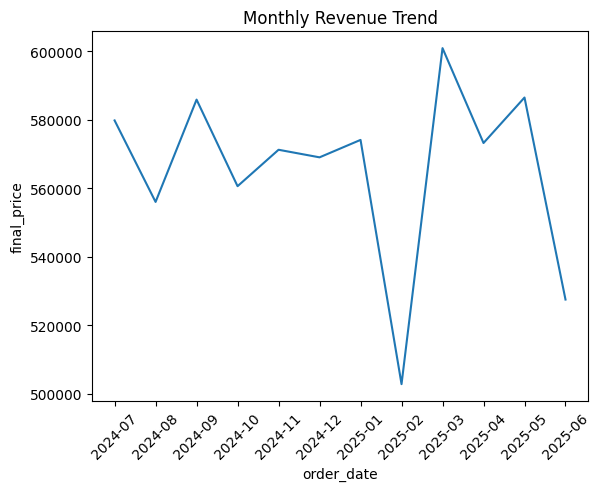

In [26]:
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['final_price'].sum().reset_index()
monthly_revenue['order_date'] = monthly_revenue['order_date'].astype(str)

sns.lineplot(data=monthly_revenue, x='order_date', y='final_price')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)

<Axes: xlabel='main_category', ylabel='final_price'>

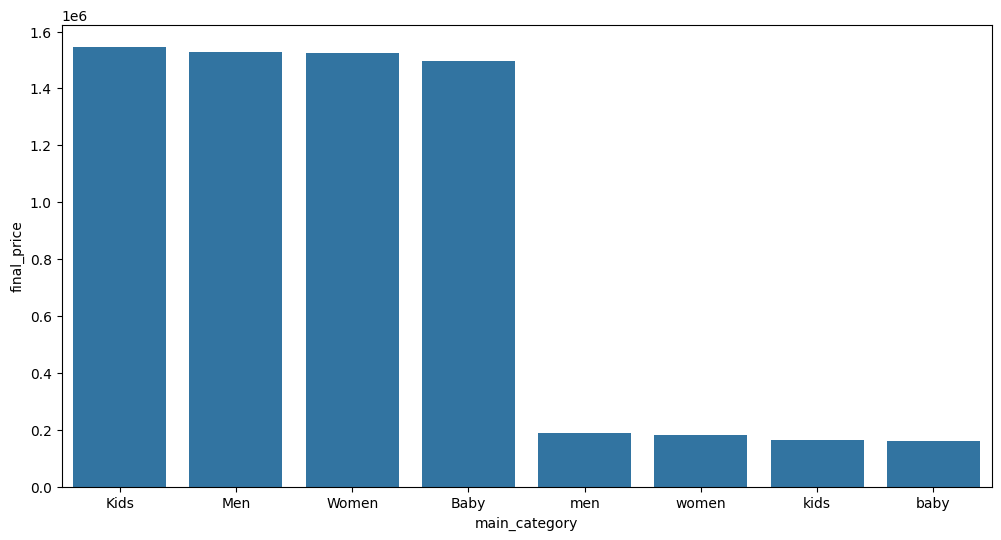

In [27]:
category_revenue = df.groupby('main_category')['final_price'].sum().sort_values(ascending=False).reset_index()
brand_revenue = df.groupby('brand')['final_price'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=category_revenue, x='main_category', y='final_price')

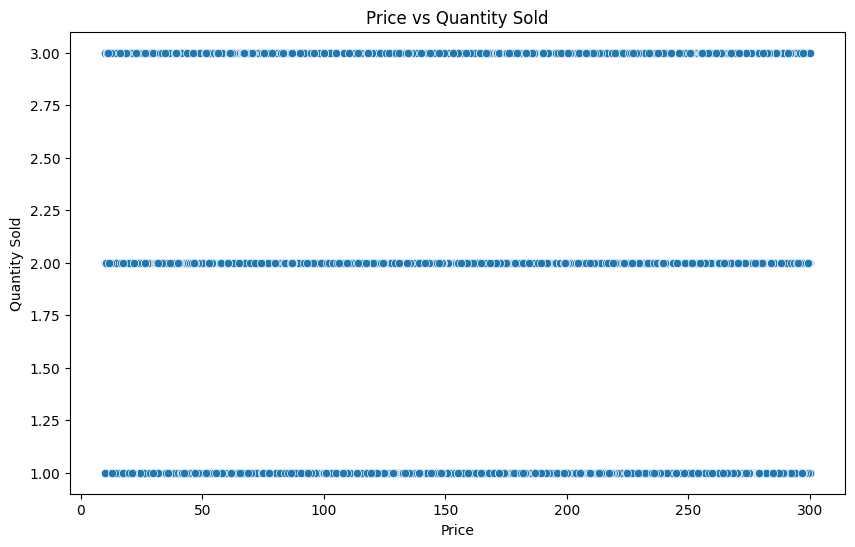

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='quantity')
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

**2. Discount Effectiveness:**

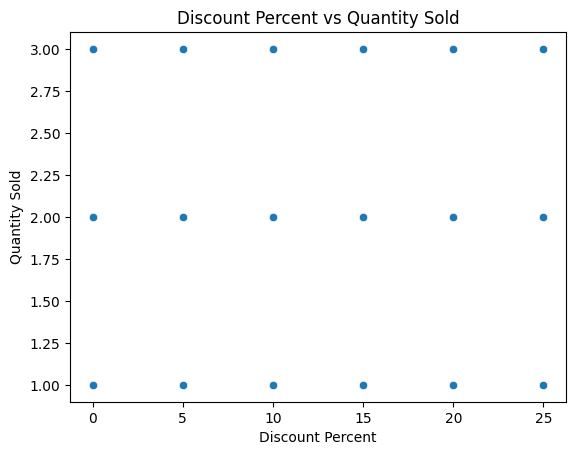

In [29]:
sns.scatterplot(data=df, x='discount_percent', y='quantity')
plt.title('Discount Percent vs Quantity Sold')
plt.xlabel('Discount Percent')
plt.ylabel('Quantity Sold')
plt.show()

**3. Returns Analysis:**

Text(0.5, 1.0, 'Return Rate by Device Type')

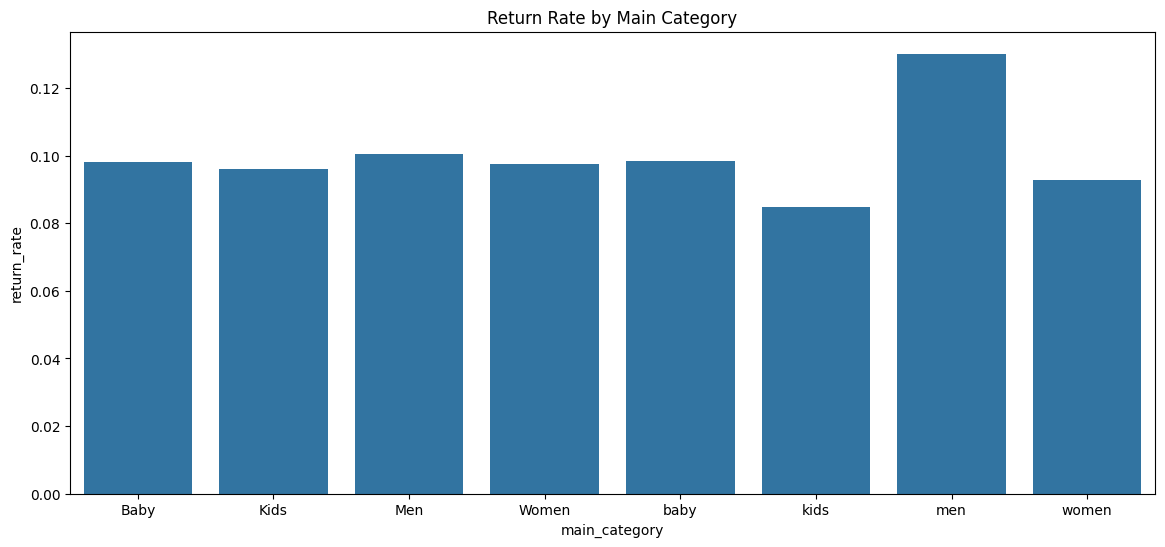

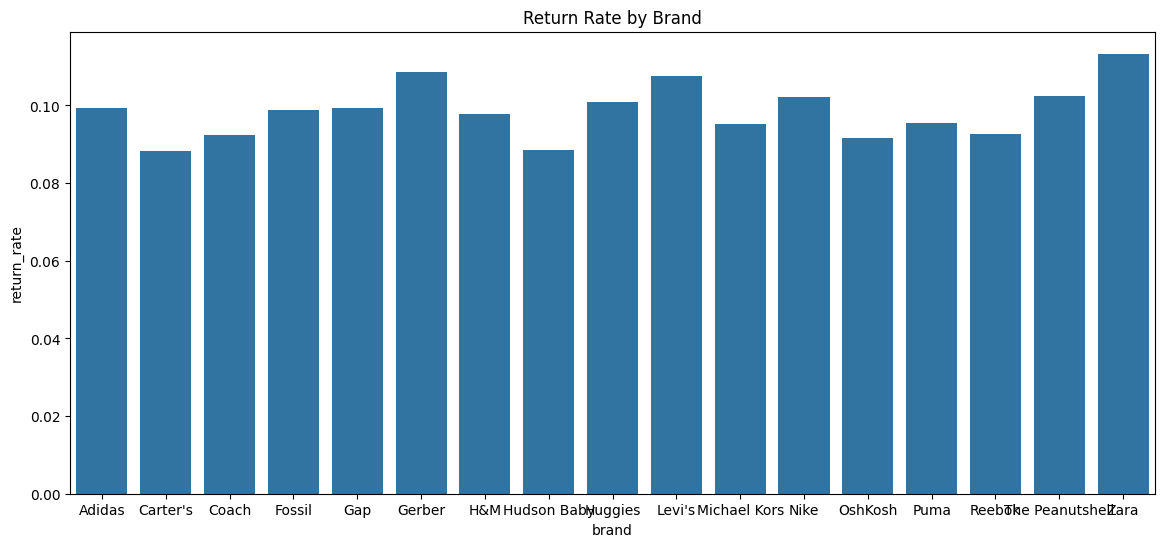

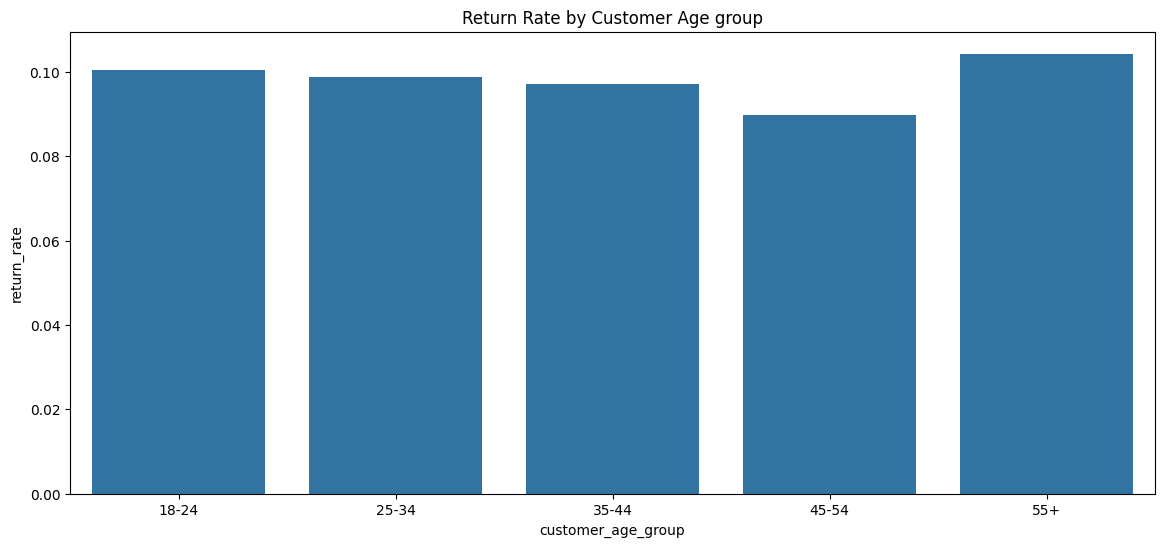

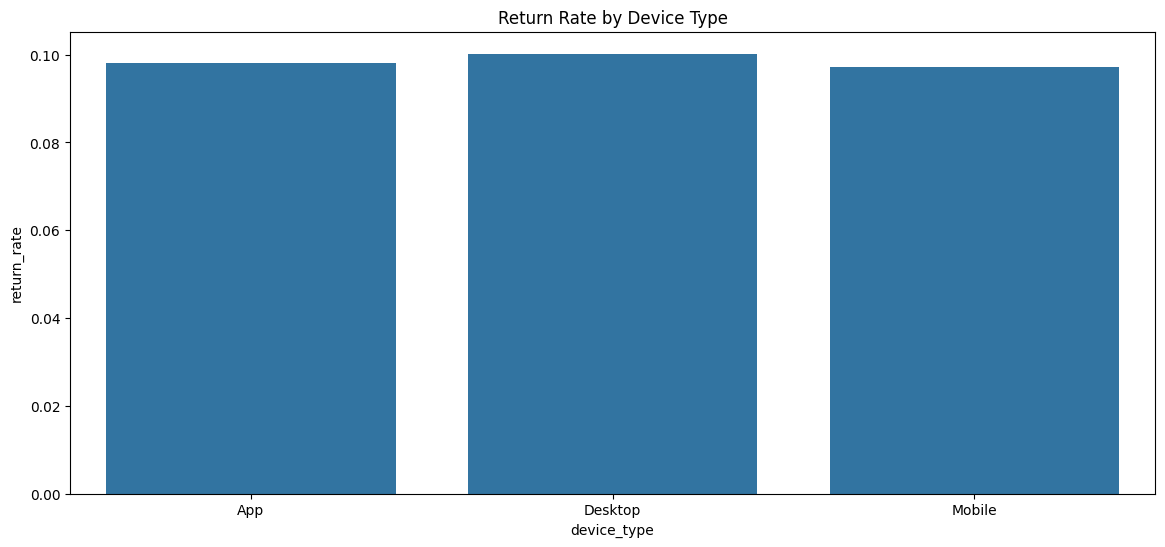

In [30]:
grouped = df.groupby('main_category').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()

grouped['return_rate'] = grouped['returns'] / grouped['total_orders']

plt.figure(figsize=(14,6))
sns.barplot(data=grouped, x='main_category', y='return_rate')
plt.title('Return Rate by Main Category')


grouped_b = df.groupby('brand').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()

grouped_b['return_rate'] = grouped_b['returns'] / grouped_b['total_orders']

plt.figure(figsize=(14,6))
sns.barplot(data=grouped_b, x='brand', y='return_rate')
plt.title('Return Rate by Brand')



grouped_c = df.groupby('customer_age_group').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()

grouped_c['return_rate'] = grouped_c['returns'] / grouped_c['total_orders']

plt.figure(figsize=(14,6))
sns.barplot(data=grouped_c, x='customer_age_group', y='return_rate')
plt.title('Return Rate by Customer Age group')


grouped_d = df.groupby('device_type').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()

grouped_d['return_rate'] = grouped_d['returns'] / grouped_d['total_orders']

plt.figure(figsize=(14,6))
sns.barplot(data=grouped_d, x='device_type', y='return_rate')
plt.title('Return Rate by Device Type')



**4. Customer Behavior:**

In [31]:
customer_summary = df.groupby('customer_id').agg(
    total_orders=('order_id', 'count'),
    total_spent=('final_price', 'sum')
).reset_index()


customer_summary['segment'] = 'One-time Buyer'
customer_summary.loc[
    (customer_summary['total_orders'] > 1) | (customer_summary['total_spent'] > 300),
    'segment'
] = 'High-value Customer'

print(customer_summary['segment'].value_counts())

segment
One-time Buyer         16075
High-value Customer     8925
Name: count, dtype: int64


**5. Delivery Performance:**

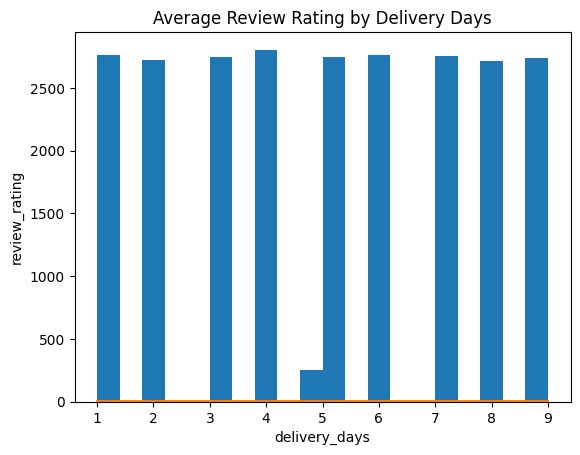

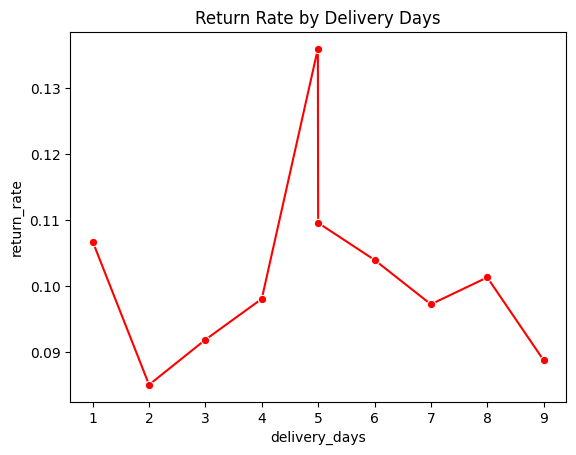

In [32]:
plt.hist(df['delivery_days'], bins=20)
avg_rating_by_delivery = df.groupby('delivery_days')['review_rating'].mean().reset_index()
sns.lineplot(data=avg_rating_by_delivery, x='delivery_days', y='review_rating')
plt.title('Average Review Rating by Delivery Days')
plt.show()


return_rate_by_delivery = df.groupby('delivery_days').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()
return_rate_by_delivery['return_rate'] = return_rate_by_delivery['returns'] / return_rate_by_delivery['total_orders']

sns.lineplot(data=return_rate_by_delivery, x='delivery_days', y='return_rate', marker='o', color='red')
plt.title('Return Rate by Delivery Days')
plt.show()

**6. Rating Signal:**

In [33]:
avg_rating_brand = df.groupby('brand')['review_rating'].mean().reset_index()
avg_rating_category = df.groupby('main_category')['review_rating'].mean().reset_index()
avg_rating_region = df.groupby('region')['review_rating'].mean().reset_index()


avg_rating_brand
avg_rating_category
avg_rating_region


,region,review_rating
0,Midwest,3.700097
1,Northeast,3.703306
2,South,3.699041
3,West,3.689366


/tmp/ipython-input-2624368239.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_return, x='review_rating', y='return_rate', palette='coolwarm')


Text(0.5, 1.0, 'Return Rate by Review Rating')

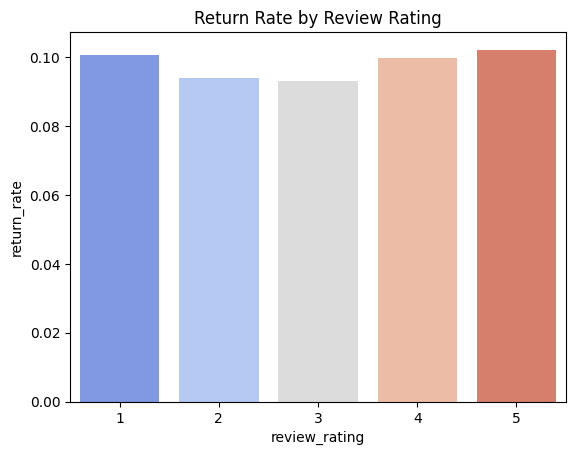

In [34]:

rating_return = df.groupby('review_rating').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()

rating_return['return_rate'] = rating_return['returns'] / rating_return['total_orders']

sns.barplot(data=rating_return, x='review_rating', y='return_rate', palette='coolwarm')
plt.title('Return Rate by Review Rating')

**7. Payment Method Insights:**

In [35]:
return_rate_payment = df.groupby('payment_method').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()

return_rate_payment['return_rate'] = return_rate_payment['returns'] / return_rate_payment['total_orders']

print(return_rate_payment[['payment_method', 'return_rate']])

     payment_method  return_rate
0  Cash on Delivery     0.089006
1       Credit Card     0.097578
2         Gift Card     0.105892
3            PayPal     0.101359


**8. Cross-analysis:**

  device_type  return_rate
0         App     0.098005
1     Desktop     0.100230
2      Mobile     0.097177


<Axes: xlabel='device_type', ylabel='return_rate'>

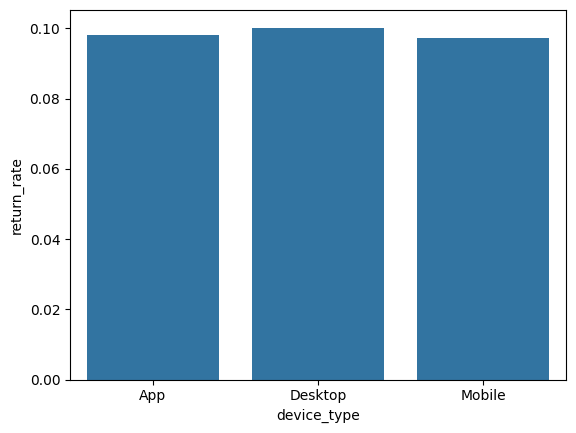

In [36]:
return_rate_device = df.groupby('device_type').agg(
    total_orders=('order_id', 'count'),
    returns=('is_returned', 'sum')
).reset_index()
return_rate_device['return_rate'] = return_rate_device['returns'] / return_rate_device['total_orders']

print(return_rate_device[['device_type', 'return_rate']])

sns.barplot(data=return_rate_device, x='device_type', y='return_rate')


      region  delivery_days
0    Midwest       4.998561
1  Northeast       5.021427
2      South       4.952141
3       West       5.006829


<Axes: xlabel='region', ylabel='delivery_days'>

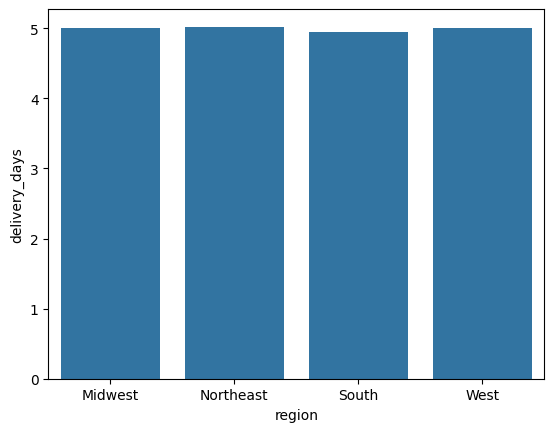

In [37]:
avg_delivery_region = df.groupby('region')['delivery_days'].mean().reset_index()
print(avg_delivery_region)

sns.barplot(data=avg_delivery_region, x='region', y='delivery_days')


  customer_age_group  avg_discount  avg_quantity  avg_revenue
0              18-24     12.585475      2.007645   277.328573
1              25-34     12.518286      2.010867   274.464765
2              35-44     12.522029      1.985386   268.324251
3              45-54     12.486327      1.982541   267.671849
4                55+     12.525824      2.007870   270.046965


<Axes: xlabel='customer_age_group', ylabel='avg_discount'>

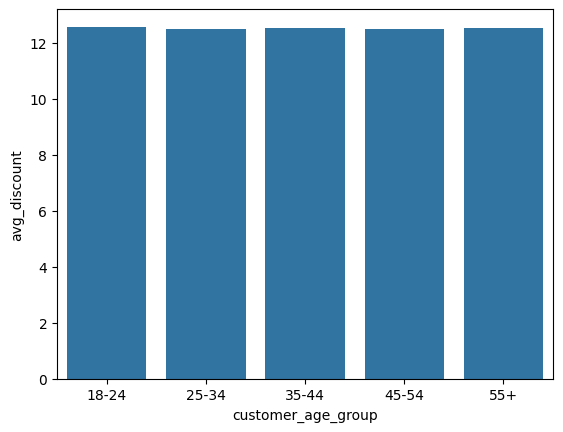

In [38]:
discount_age = df.groupby('customer_age_group').agg(
    avg_discount=('discount_percent', 'mean'),
    avg_quantity=('quantity', 'mean'),
    avg_revenue=('final_price', 'mean')
).reset_index()

print(discount_age)
sns.barplot(data=discount_age, x='customer_age_group', y='avg_discount')

# **D. Hypothesis Ideas**

**Longer delivery times negatively impact review ratings and increase returns.**


When a product takes more days to be delivered, customers may get frustrated or
disappointed.

This frustration can lead them to give lower review ratings because the experience wasn't good.

Also, longer delivery might make customers more likely to return the product — maybe because the item arrived late or they changed their mind.


**Certain age groups (e.g., 25–34) have higher average order values.**

Different age groups may spend different amounts of money when they shop.

For example, people aged 25 to 34 might buy more items or more expensive products per order compared to other age groups.

Average Order Value (AOV) measures the average amount spent each time a customer places an order.



**Premium brands (e.g., Nike) have lower return rates despite higher prices.**

Premium brands usually charge more for their products.

Despite the higher prices, customers might be less likely to return items from these brands.

Reasons could include better product quality, stronger brand trust, or higher customer satisfaction.

**Orders with low review ratings are predictive of being returned.**

When customers give a low rating to an order (e.g., 1 or 2 stars), it might indicate dissatisfaction.

This dissatisfaction could be because of product quality, delivery issues, or other problems.

Such unhappy customers are more likely to return the product.

So, low ratings can serve as a signal or predictor that the order might be returned.


**Higher discounts lead to higher quantity sold but also higher return rates.**

When products are offered at bigger discounts, more customers are likely to buy them, increasing the quantity sold.

However, customers might buy more impulsively or stock up on discounted items they don’t really need.

This can lead to more returns because customers may change their minds, find better deals elsewhere, or be less satisfied with discounted products.

So, while discounts boost sales volume, they might also increase the chances of returns.

# **E. Advanced Analyses**

**1. Cohort Analysis:**

In [39]:
df['order_date'] = pd.to_datetime(df['order_date'])

first_month = df.groupby('customer_id')['order_date'].min().dt.to_period('M').reset_index()
first_month.columns = ['customer_id', 'first_purchase_month']

df = df.merge(first_month, on='customer_id')

df['order_month'] = df['order_date'].dt.to_period('M')

df['months_since_first'] = (df['order_month'] - df['first_purchase_month']).apply(lambda x: x.n)

cohort_counts = df.groupby(['first_purchase_month', 'months_since_first'])['customer_id'].nunique().reset_index()

cohort_sizes = cohort_counts[cohort_counts['months_since_first'] == 0][['first_purchase_month', 'customer_id']]
cohort_sizes.columns = ['first_purchase_month', 'cohort_size']

cohort_counts = cohort_counts.merge(cohort_sizes, on='first_purchase_month')
cohort_counts['retention_rate'] = cohort_counts['customer_id'] / cohort_counts['cohort_size']

print(cohort_counts)


   first_purchase_month  months_since_first  customer_id  cohort_size  \
0               2024-07                   0         2117         2117   
1               2024-08                   0         2087         2087   
2               2024-09                   0         2167         2167   
3               2024-10                   0         2058         2058   
4               2024-11                   0         2098         2098   
5               2024-12                   0         2090         2090   
6               2025-01                   0         2108         2108   
7               2025-02                   0         1910         1910   
8               2025-03                   0         2170         2170   
9               2025-04                   0         2052         2052   
10              2025-05                   0         2175         2175   
11              2025-06                   0         1968         1968   

    retention_rate  
0              1.0  
1       

**2. Customer Segmentation:**

In [40]:
from sklearn.cluster import KMeans
from datetime import datetime

In [41]:
today = pd.to_datetime('2025-08-10')

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (today - x.max()).days,
    'order_id': 'count',
    'final_price': 'sum',
    'is_returned': 'mean',
    'review_rating': 'mean'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary', 'ReturnRate', 'AvgRating']


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Recency', 'Frequency', 'Monetary', 'ReturnRate', 'AvgRating']
rfm_scaled = scaler.fit_transform(rfm[features])

kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


print(rfm.groupby('Cluster')[features].mean())

            Recency  Frequency    Monetary  ReturnRate  AvgRating
Cluster                                                          
0        318.006451        1.0  179.702951    0.107128   3.689298
1        225.262053        1.0  559.205947    0.089871   3.748026
2        128.727244        1.0  183.408529    0.095193   3.675633


**3. Price Elasticity Estimation:**

In [42]:
import statsmodels.api as sm

X = df['discount_percent']
y = df['quantity']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.001830
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.966
Time:                        07:41:15   Log-Likelihood:                -30351.
No. Observations:               25000   AIC:                         6.071e+04
Df Residuals:                   24998   BIC:                         6.072e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9997      0.009  

**4. Return Prediction Feature Ideas:**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [44]:
features = ['price', 'quantity', 'discount_percent', 'delivery_days', 'review_rating', 'payment_method']
X = df[features]
y = df['is_returned']


cat_cols = ['payment_method']
num_cols = ['price', 'quantity', 'discount_percent', 'delivery_days', 'review_rating']


preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

ohe_features = model.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(cat_cols)
all_features = num_cols + list(ohe_features)

coef = model.named_steps['clf'].coef_[0]

feat_imp = pd.DataFrame({'feature': all_features, 'coefficient': coef})
print(feat_imp.sort_values(by='coefficient', ascending=False))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4474
           1       0.00      0.00      0.00       526

    accuracy                           0.89      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.80      0.89      0.85      5000

                           feature  coefficient
4                    review_rating     0.029593
3                    delivery_days     0.002151
0                            price    -0.000126
2                 discount_percent    -0.000163
1                         quantity    -0.044004
7         payment_method_Gift Card    -0.368114
8            payment_method_PayPal    -0.408034
6       payment_method_Credit Card    -0.447594
5  payment_method_Cash on Delivery    -0.566027


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**5. Anomaly Detection:**

In [45]:
high_discount = 50
high_quantity = 5


suspicious_orders = df[
    (df['discount_percent'] >= high_discount) &
    (df['quantity'] >= high_quantity) &
    (df['is_returned'] == 1)
]

print("Suspicious orders count:", len(suspicious_orders))
print(suspicious_orders[['order_id', 'discount_percent', 'quantity', 'is_returned']])

Suspicious orders count: 0
Empty DataFrame
Columns: [order_id, discount_percent, quantity, is_returned]
Index: []


**6. Time-to-Delivery Hotspots:**

In [46]:
avg_delivery_region = df.groupby('region')['delivery_days'].mean().reset_index().sort_values(by='delivery_days', ascending=False)
print("Average delivery days by region:")
print(avg_delivery_region)

# Average delivery days by main category
avg_delivery_category = df.groupby('main_category')['delivery_days'].mean().reset_index().sort_values(by='delivery_days', ascending=False)
print("\nAverage delivery days by product category:")
print(avg_delivery_category)

Average delivery days by region:
      region  delivery_days
1  Northeast       5.021427
3       West       5.006829
0    Midwest       4.998561
2      South       4.952141

Average delivery days by product category:
  main_category  delivery_days
5          kids       5.093133
0          Baby       5.029920
1          Kids       5.006764
7         women       4.995126
2           Men       4.979836
3         Women       4.963141
4          baby       4.950694
6           men       4.941721


# **F.Visualization Expectations**

Text(0, 0.5, 'Amount / Count')

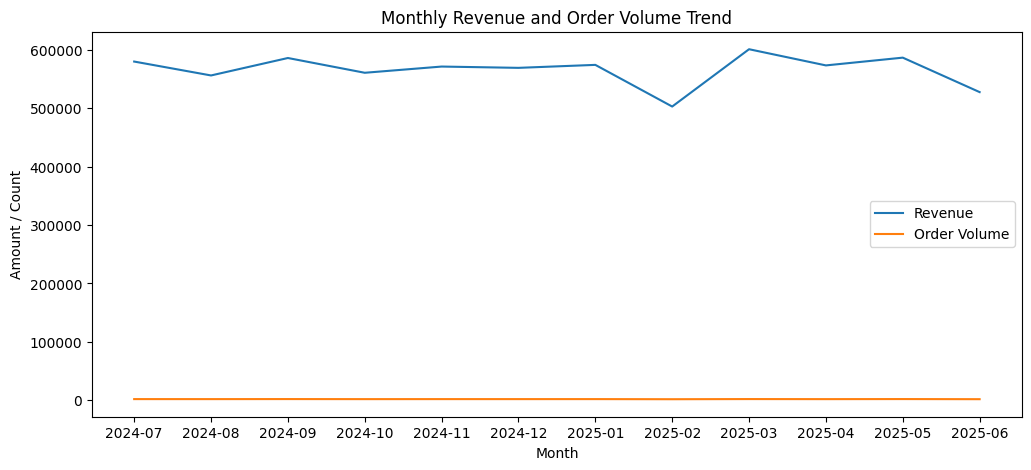

In [47]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_revenue = df.groupby('order_month')['final_price'].sum().reset_index()
monthly_orders = df.groupby('order_month')['order_id'].count().reset_index()

monthly_revenue['order_month'] = monthly_revenue['order_month'].astype(str)
monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue, x='order_month', y='final_price', label='Revenue')
sns.lineplot(data=monthly_orders, x='order_month', y='order_id', label='Order Volume')
plt.title('Monthly Revenue and Order Volume Trend')
plt.xlabel('Month')
plt.ylabel('Amount / Count')

Text(0, 0.5, 'Price')

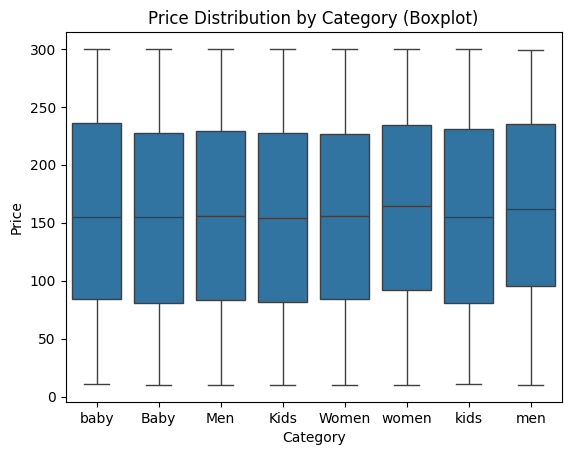

In [48]:
sns.boxplot(data=df, x='main_category', y='price')
plt.title('Price Distribution by Category (Boxplot)')
plt.xlabel('Category')
plt.ylabel('Price')

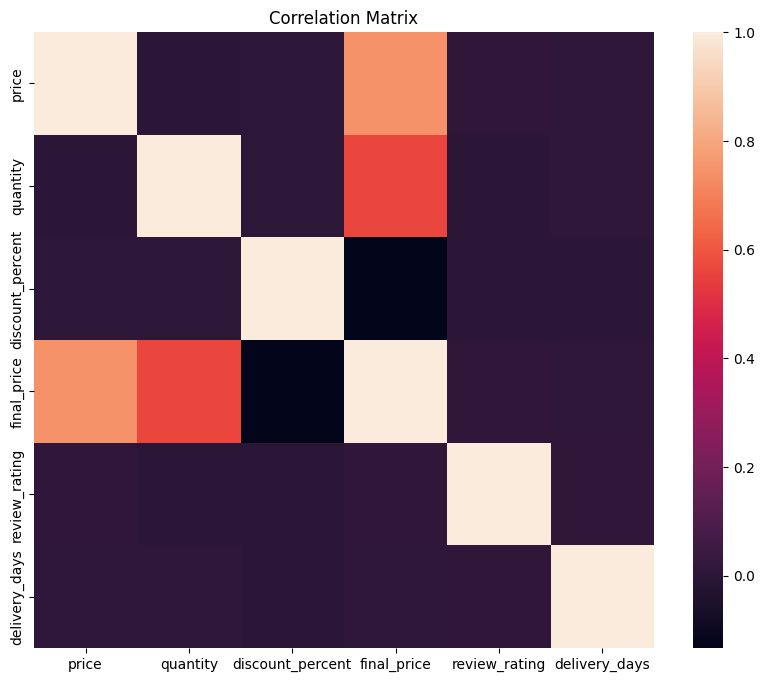

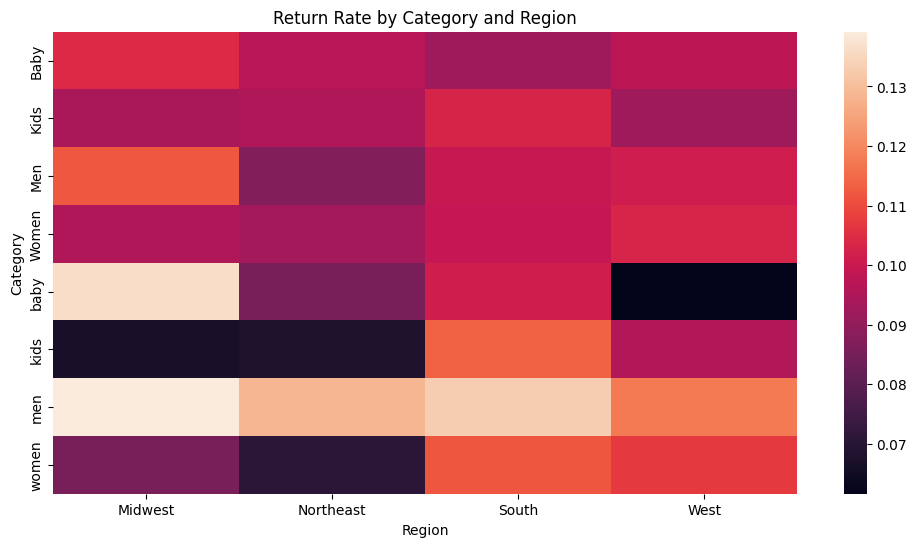

In [49]:
plt.figure(figsize=(10,8))
corr = df[['price', 'quantity', 'discount_percent', 'final_price', 'review_rating', 'delivery_days']].corr()
sns.heatmap(corr)
plt.title('Correlation Matrix')
plt.show()


pivot = df.pivot_table(index='main_category', columns='region', values='is_returned', aggfunc='mean').fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(pivot)
plt.title('Return Rate by Category and Region')
plt.xlabel('Region')
plt.ylabel('Category')
plt.show()


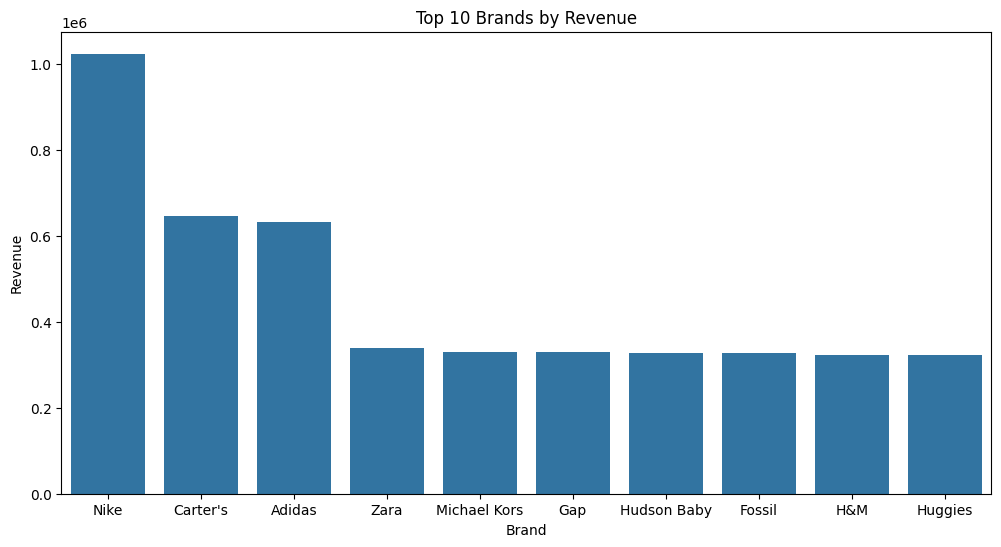

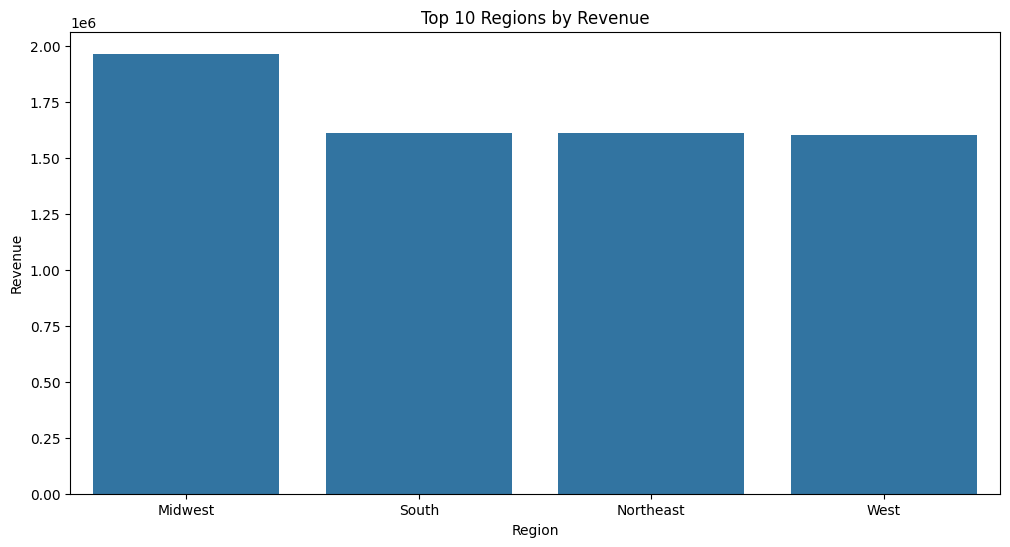

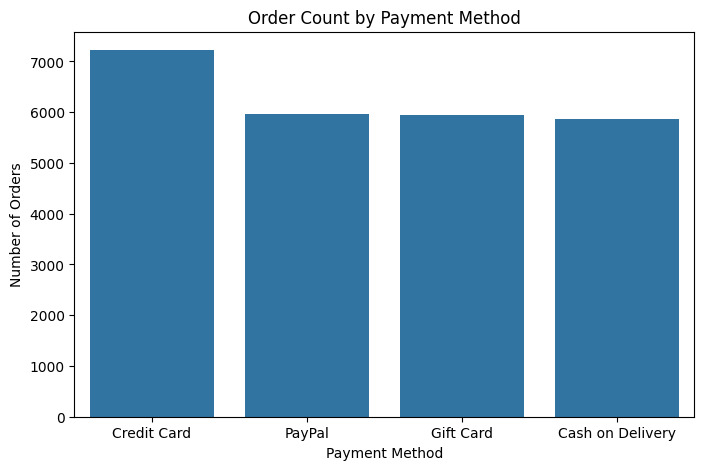

In [50]:
top_brands = df.groupby('brand')['final_price'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_brands, x='brand', y='final_price')
plt.title('Top 10 Brands by Revenue')
plt.xlabel('Brand')
plt.ylabel('Revenue')
plt.show()

top_regions = df.groupby('region')['final_price'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_regions, x='region', y='final_price')
plt.title('Top 10 Regions by Revenue')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.show()


payment_counts = df['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'order_count']
plt.figure(figsize=(8,5))
sns.barplot(data=payment_counts, x='payment_method', y='order_count')
plt.title('Order Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.show()

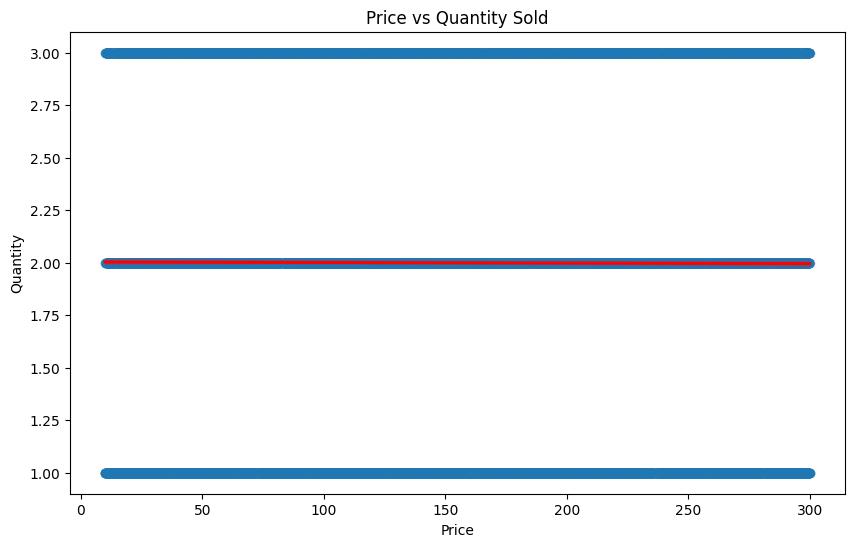

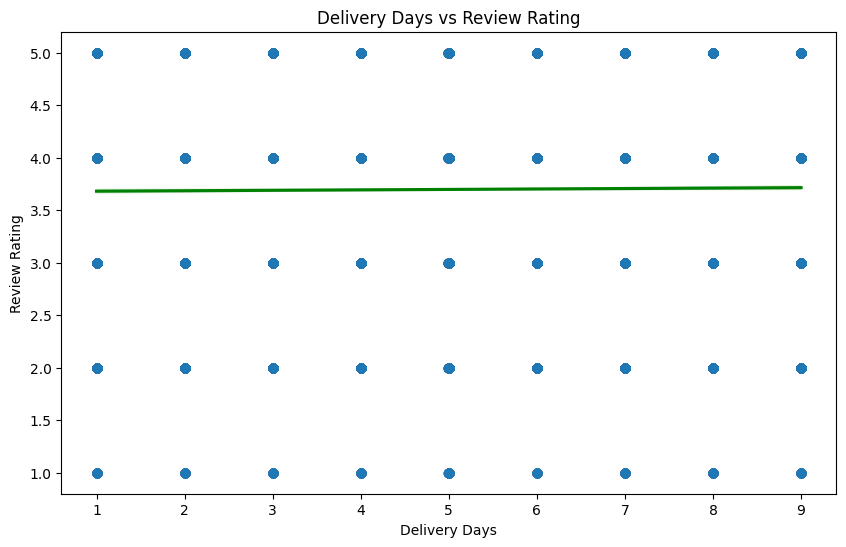

In [51]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='price', y='quantity', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()


plt.figure(figsize=(10,6))
sns.regplot(data=df, x='delivery_days', y='review_rating', scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Delivery Days vs Review Rating')
plt.xlabel('Delivery Days')
plt.ylabel('Review Rating')
plt.show()

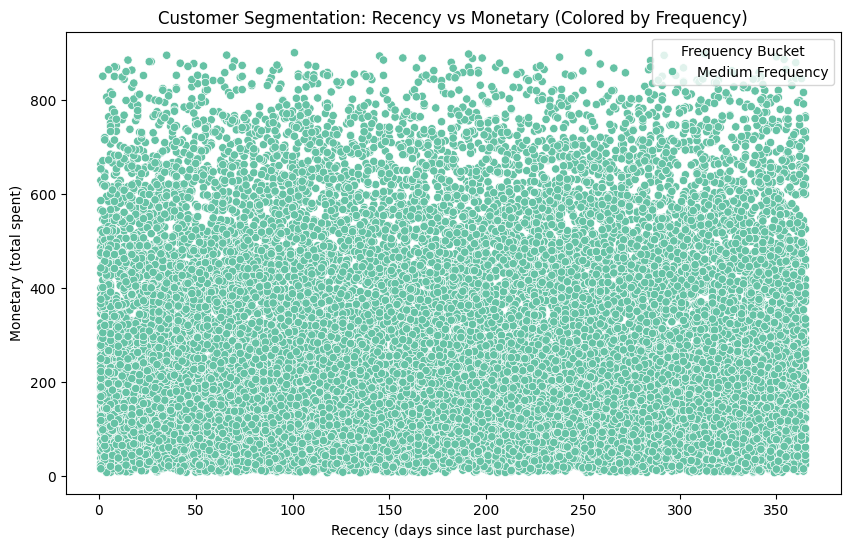

In [52]:
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count',
    'final_price': 'sum'
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

rfm['R_bucket'] = pd.qcut(rfm['Recency'], 3, labels=['High Recency', 'Medium Recency', 'Low Recency'], duplicates='drop')

try:
    rfm['F_bucket'] = pd.qcut(rfm['Frequency'], 3, labels=['Low Frequency', 'Medium Frequency', 'High Frequency'], duplicates='drop')
except:
    rfm['F_bucket'] = 'Medium Frequency'

rfm['M_bucket'] = pd.qcut(rfm['Monetary'], 3, labels=['Low Monetary', 'Medium Monetary', 'High Monetary'], duplicates='drop')


plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='F_bucket', palette='Set2')
plt.title('Customer Segmentation: Recency vs Monetary (Colored by Frequency)')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Monetary (total spent)')
plt.legend(title='Frequency Bucket')
plt.show()

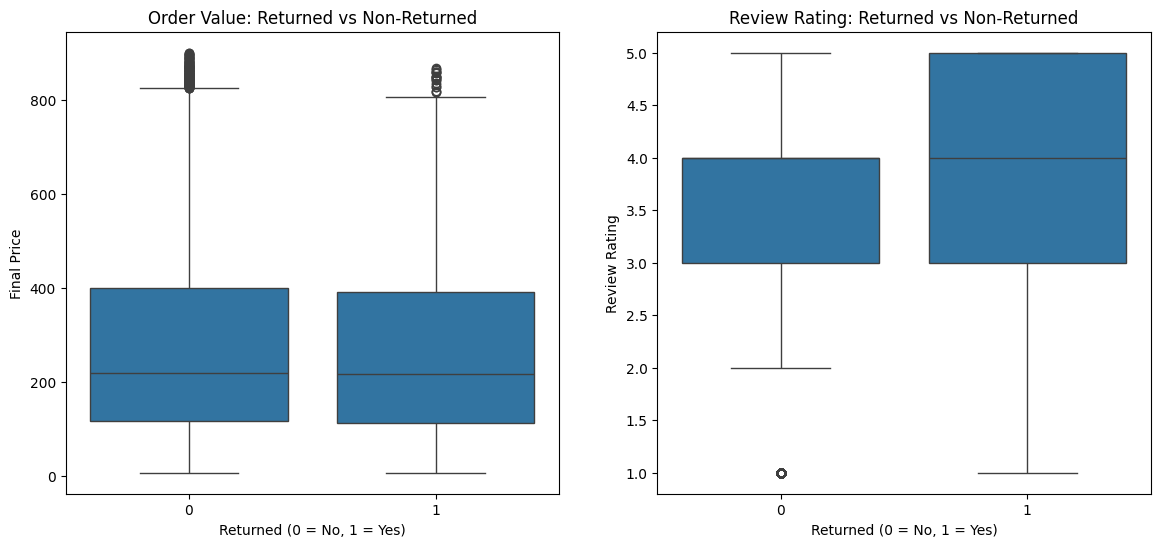

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))


sns.boxplot(data=df, x='is_returned', y='final_price', ax=axes[0])
axes[0].set_title('Order Value: Returned vs Non-Returned')
axes[0].set_xlabel('Returned (0 = No, 1 = Yes)')
axes[0].set_ylabel('Final Price')

sns.boxplot(data=df, x='is_returned', y='review_rating', ax=axes[1])
axes[1].set_title('Review Rating: Returned vs Non-Returned')
axes[1].set_xlabel('Returned (0 = No, 1 = Yes)')
axes[1].set_ylabel('Review Rating')


plt.show()